# Time Series Analysis of Aquifer Luco

## Background of dataset

The data was provided from The Acea Group fromItaly. The Acea Group is one of the leading Italian multiutility operators. Listed on the Italian Stock Exchange since 1999, the company manages and develops water and electricity networks and environmental services. Acea is the foremost Italian operator in the water services sector supplying 9 million inhabitants in Lazio, Tuscany, Umbria, Molise, Campania. 

They've provided several datasets on several waterbody in Italy. As it is easy to imagine, a water supply company struggles with the need to forecast the water level in a waterbody (water spring, lake, river, or aquifer) to handle daily consumption. During fall and winter waterbodies are refilled, but during spring and summer they start to drain. To help preserve the health of these waterbodies it is important to predict the most efficient water availability, in terms of level and water flow for each day of the year. The Acea Group deals with four different type of waterbodies: water springs, lakes, rivers and aquifers. In this analytics, we'll look specifically at Luco Aquifer.

## What is Aquifer?
According to NationalGeography, an aquifer is a body of rock and/or sediment that holds groundwater. Groundwater is the word used to describe precipitation that has infiltrated the soil beyond the surface and collected in empty spaces underground. A common misconception about aquifers is that they are underground rivers or lakes. While groundwater can seep into or out of aquifers due to their porous nature, it cannot move fast enough to flow like a river. The rate at which groundwater moves through an aquifer varies depending on the rock’s permeability. When a water-bearing rock readily transmits water to wells and springs, it is called an aquifer.

## Loading library

In [109]:
library(forecast)
library(repr)
library(tidyverse)
library(urca)
library(gridExtra)
library(seastests)
library(naniar)
library(imputeTS)
library(tsbox)  # maybe needed
library(corrplot)
library(tseries)

## Load data

In [110]:
luco <- read.csv("/home/han/Projects/ACEA_Water/acea-water-prediction/Aquifer_Luco.csv")
# I had a look at the data, there were plenty of missing values, 
# Depth_to_Groundwater_Podere_Casetta is the output column
# the other columns of interest are most complete from 2012 onwards
# only the temperatures were taken because the other ones just give 0
dim(luco)
head(luco)

[1] 7487   22

,Date,Rainfall_Simignano,Rainfall_Siena_Poggio_al_Vento,Rainfall_Mensano,Rainfall_Montalcinello,Rainfall_Monticiano_la_Pineta,Rainfall_Sovicille,Rainfall_Ponte_Orgia,Rainfall_Scorgiano,Rainfall_Pentolina,⋯,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Temperature_Siena_Poggio_al_Vento,Temperature_Mensano,Temperature_Pentolina,Temperature_Monteroni_Arbia_Biena,Volume_Pozzo_1,Volume_Pozzo_3,Volume_Pozzo_4
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,01/01/2000,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,0,0,5.50,0.80,NA,NA,NA
2,02/01/2000,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,0,0,6.20,3.25,NA,NA,NA
3,03/01/2000,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,0,0,7.25,0.95,NA,NA,NA
4,04/01/2000,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,0,0,7.00,4.20,NA,NA,NA
5,05/01/2000,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,0,0,7.90,6.55,NA,NA,NA
6,06/01/2000,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,0,0,6.50,3.95,NA,NA,NA


## Data Preprocessing

### Manipulate date

In [183]:
luco$Date <- luco$Date %>% as.Date(format = "%d/%m/%Y")
tail(luco)
dim(luco)

,Date,Rainfall_Simignano,Rainfall_Siena_Poggio_al_Vento,Rainfall_Mensano,Rainfall_Montalcinello,Rainfall_Monticiano_la_Pineta,Rainfall_Sovicille,Rainfall_Ponte_Orgia,Rainfall_Scorgiano,Rainfall_Pentolina,⋯,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Temperature_Siena_Poggio_al_Vento,Temperature_Mensano,Temperature_Pentolina,Temperature_Monteroni_Arbia_Biena,Volume_Pozzo_1,Volume_Pozzo_3,Volume_Pozzo_4,year
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7482,2020-06-25,0,0,0,0,0,0,0,0,0,⋯,-10.6,-11.1,24.70,23.20,22.75,19.85,-125.5065,-147.0127,-49.13666,2020
7483,2020-06-26,0,0,0,0,0,0,0,0,0,⋯,-10.7,-11.1,24.45,22.65,22.50,19.55,-125.5065,-147.0127,-49.13666,2020
7484,2020-06-27,0,0,0,0,0,0,0,0,0,⋯,-10.8,-11.1,24.80,22.95,22.60,20.15,-125.5065,-147.0127,-49.13666,2020
7485,2020-06-28,0,0,0,0,0,0,0,0,0,⋯,-10.7,-11.1,25.90,23.40,23.80,21.05,-125.5065,-147.0127,-49.13666,2020
7486,2020-06-29,0,0,0,0,0,0,0,0,0,⋯,-10.8,-11.1,24.85,23.30,23.55,20.30,-125.5065,-147.0127,-49.13666,2020
7487,2020-06-30,0,0,0,0,0,0,0,0,0,⋯,-10.8,-11.1,25.75,23.70,24.20,21.65,-125.5065,-147.0127,-49.13666,2020


[1] 7487   23

In [112]:
# get the year
luco$year <- luco$Date %>% format("%Y") %>% as.factor()

### Explore missing values

In [182]:
# are there any missing values?
cat("Any missing value: ", naniar::any_na(luco), "\n")

# How many missing values?
cat("Number of missing values:", naniar::n_miss(luco),"\n")
cat("Percentage of missing values: ", naniar::pct_miss(luco), "\n")

# Get number of missings per variable (n and %)
miss_var_table_df <- miss_var_summary(luco)
miss_var_table_df

png("miss_var_table.png", height = 30*nrow(miss_var_table_df), width = 200*ncol(miss_var_table_df))
grid.table(miss_var_table_df)
dev.off()

Any missing value:  TRUE 
Number of missing values: 80610 
Percentage of missing values:  46.81157 


variable,n_miss,pct_miss
<chr>,<int>,<dbl>
Depth_to_Groundwater_Pozzo_3,6567,87.712034
Rainfall_Siena_Poggio_al_Vento,6536,87.297983
Depth_to_Groundwater_Pozzo_4,6518,87.057566
Depth_to_Groundwater_Pozzo_1,6475,86.483238
Rainfall_Ponte_Orgia,6227,83.170829
Rainfall_Mensano,5765,77.000134
Volume_Pozzo_1,5479,73.180179
Volume_Pozzo_3,5479,73.180179
Volume_Pozzo_4,5479,73.180179


png 
  2

In [114]:
# find the missing value of variables by year
output_missing_table <- luco %>% group_by(year) %>% miss_var_summary() %>% filter(variable == "Depth_to_Groundwater_Podere_Casetta")
tempPent_missing_table <- luco %>% group_by(year) %>% miss_var_summary() %>% filter(variable == "Temperature_Pentolina")
tempMont_missing_table <- luco %>% group_by(year) %>% miss_var_summary() %>% filter(variable == "Temperature_Monteroni_Arbia_Biena")
rainSim_missing_table <- luco %>% group_by(year) %>% miss_var_summary() %>% filter(variable == "Rainfall_Simignano")
rainMont_missing_table <- luco %>% group_by(year) %>% miss_var_summary() %>% filter(variable == "Rainfall_Montalcinello")
rainSo_missing_table <- luco %>% group_by(year) %>% miss_var_summary() %>% filter(variable == "Rainfall_Sovicille")
rainScor_missing_table <- luco %>% group_by(year) %>% miss_var_summary() %>% filter(variable == "Rainfall_Scorgiano")
rainPent_missing_table <- luco %>% group_by(year) %>% miss_var_summary() %>% filter(variable == "Rainfall_Pentolina")  # have a few years mising after 2012
volPoz1_missing_table <- luco %>% group_by(year) %>% miss_var_summary() %>% filter(variable == "Volume_Pozzo_1")
volPoz3_missing_table <- luco %>% group_by(year) %>% miss_var_summary() %>% filter(variable == "Volume_Pozzo_3	")
volPoz4_missing_table <- luco %>% group_by(year) %>% miss_var_summary() %>% filter(variable == "Volume_Pozzo_4")

In [115]:
output_missing_table

year,variable,n_miss,pct_miss
<fct>,<chr>,<int>,<dbl>
2000,Depth_to_Groundwater_Podere_Casetta,366,100.000000
2001,Depth_to_Groundwater_Podere_Casetta,365,100.000000
2002,Depth_to_Groundwater_Podere_Casetta,365,100.000000
2003,Depth_to_Groundwater_Podere_Casetta,365,100.000000
2004,Depth_to_Groundwater_Podere_Casetta,366,100.000000
2005,Depth_to_Groundwater_Podere_Casetta,365,100.000000
2006,Depth_to_Groundwater_Podere_Casetta,365,100.000000
2007,Depth_to_Groundwater_Podere_Casetta,365,100.000000
2008,Depth_to_Groundwater_Podere_Casetta,51,13.934426


Saving 6.67 x 6.67 in image



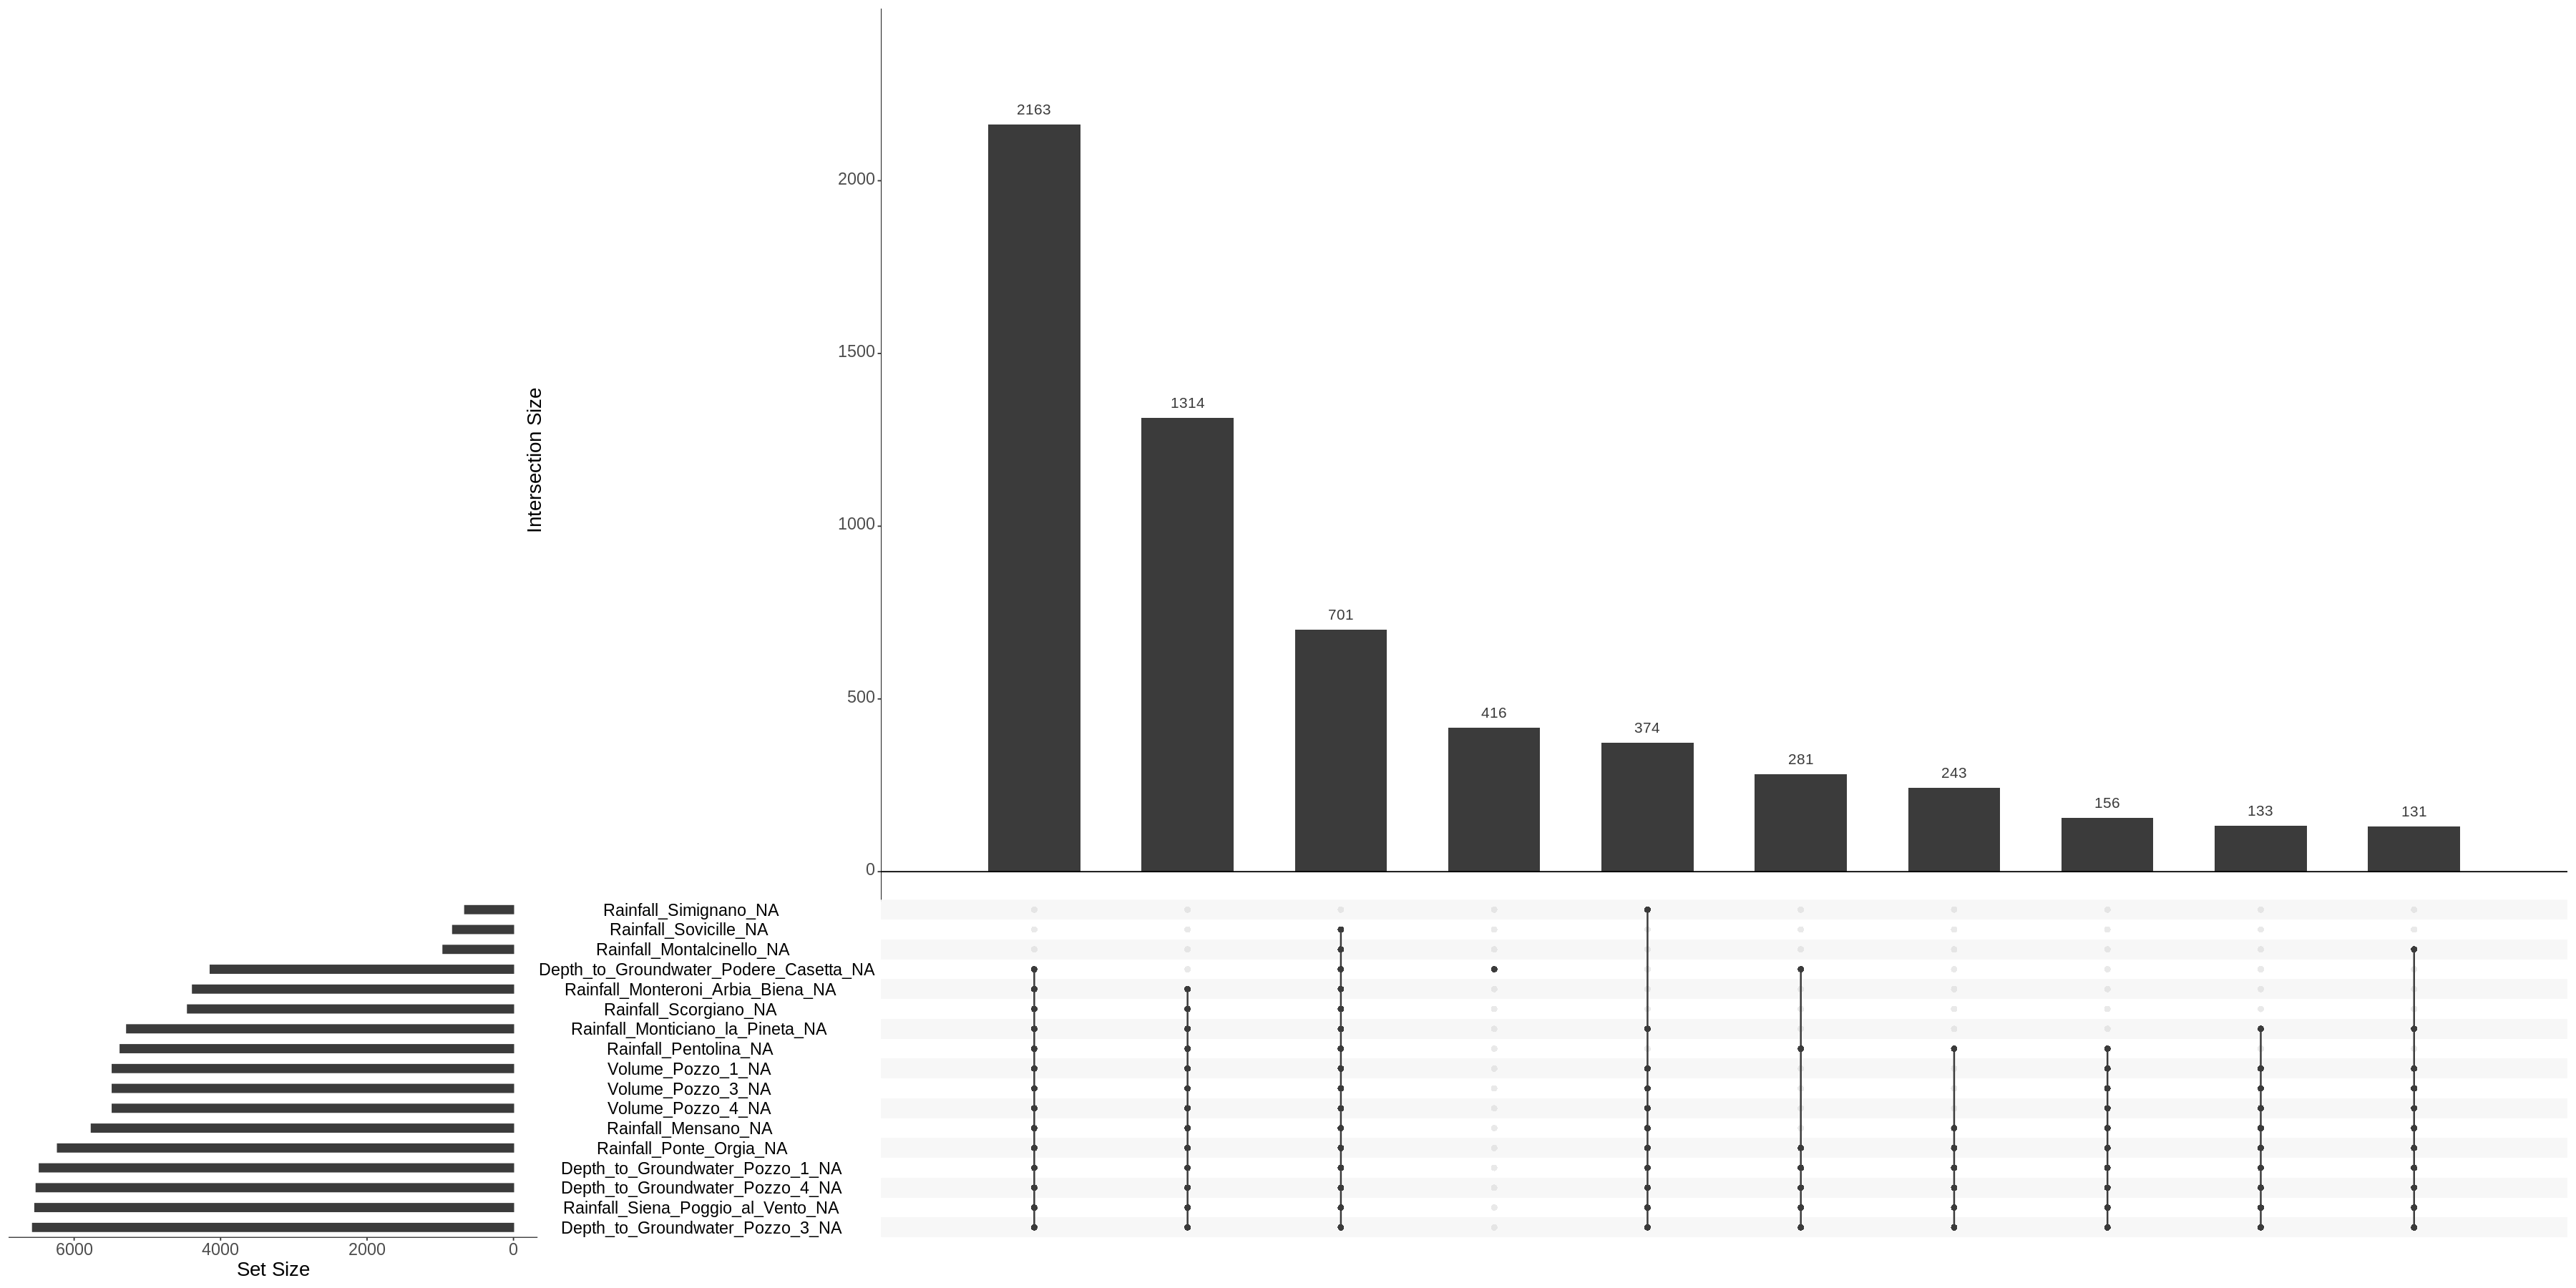

In [191]:
# explore the missing patterns
options(repr.plot.width=30, repr.plot.height=15)
gg_miss_upset(luco, nsets = n_var_miss(luco), nintersects=10, text.scale=2) 
ggsave("Missing_patterns.png", device = "png", path="/home/han/Projects/ACEA_Water/Images/") 

Saving 6.67 x 6.67 in image



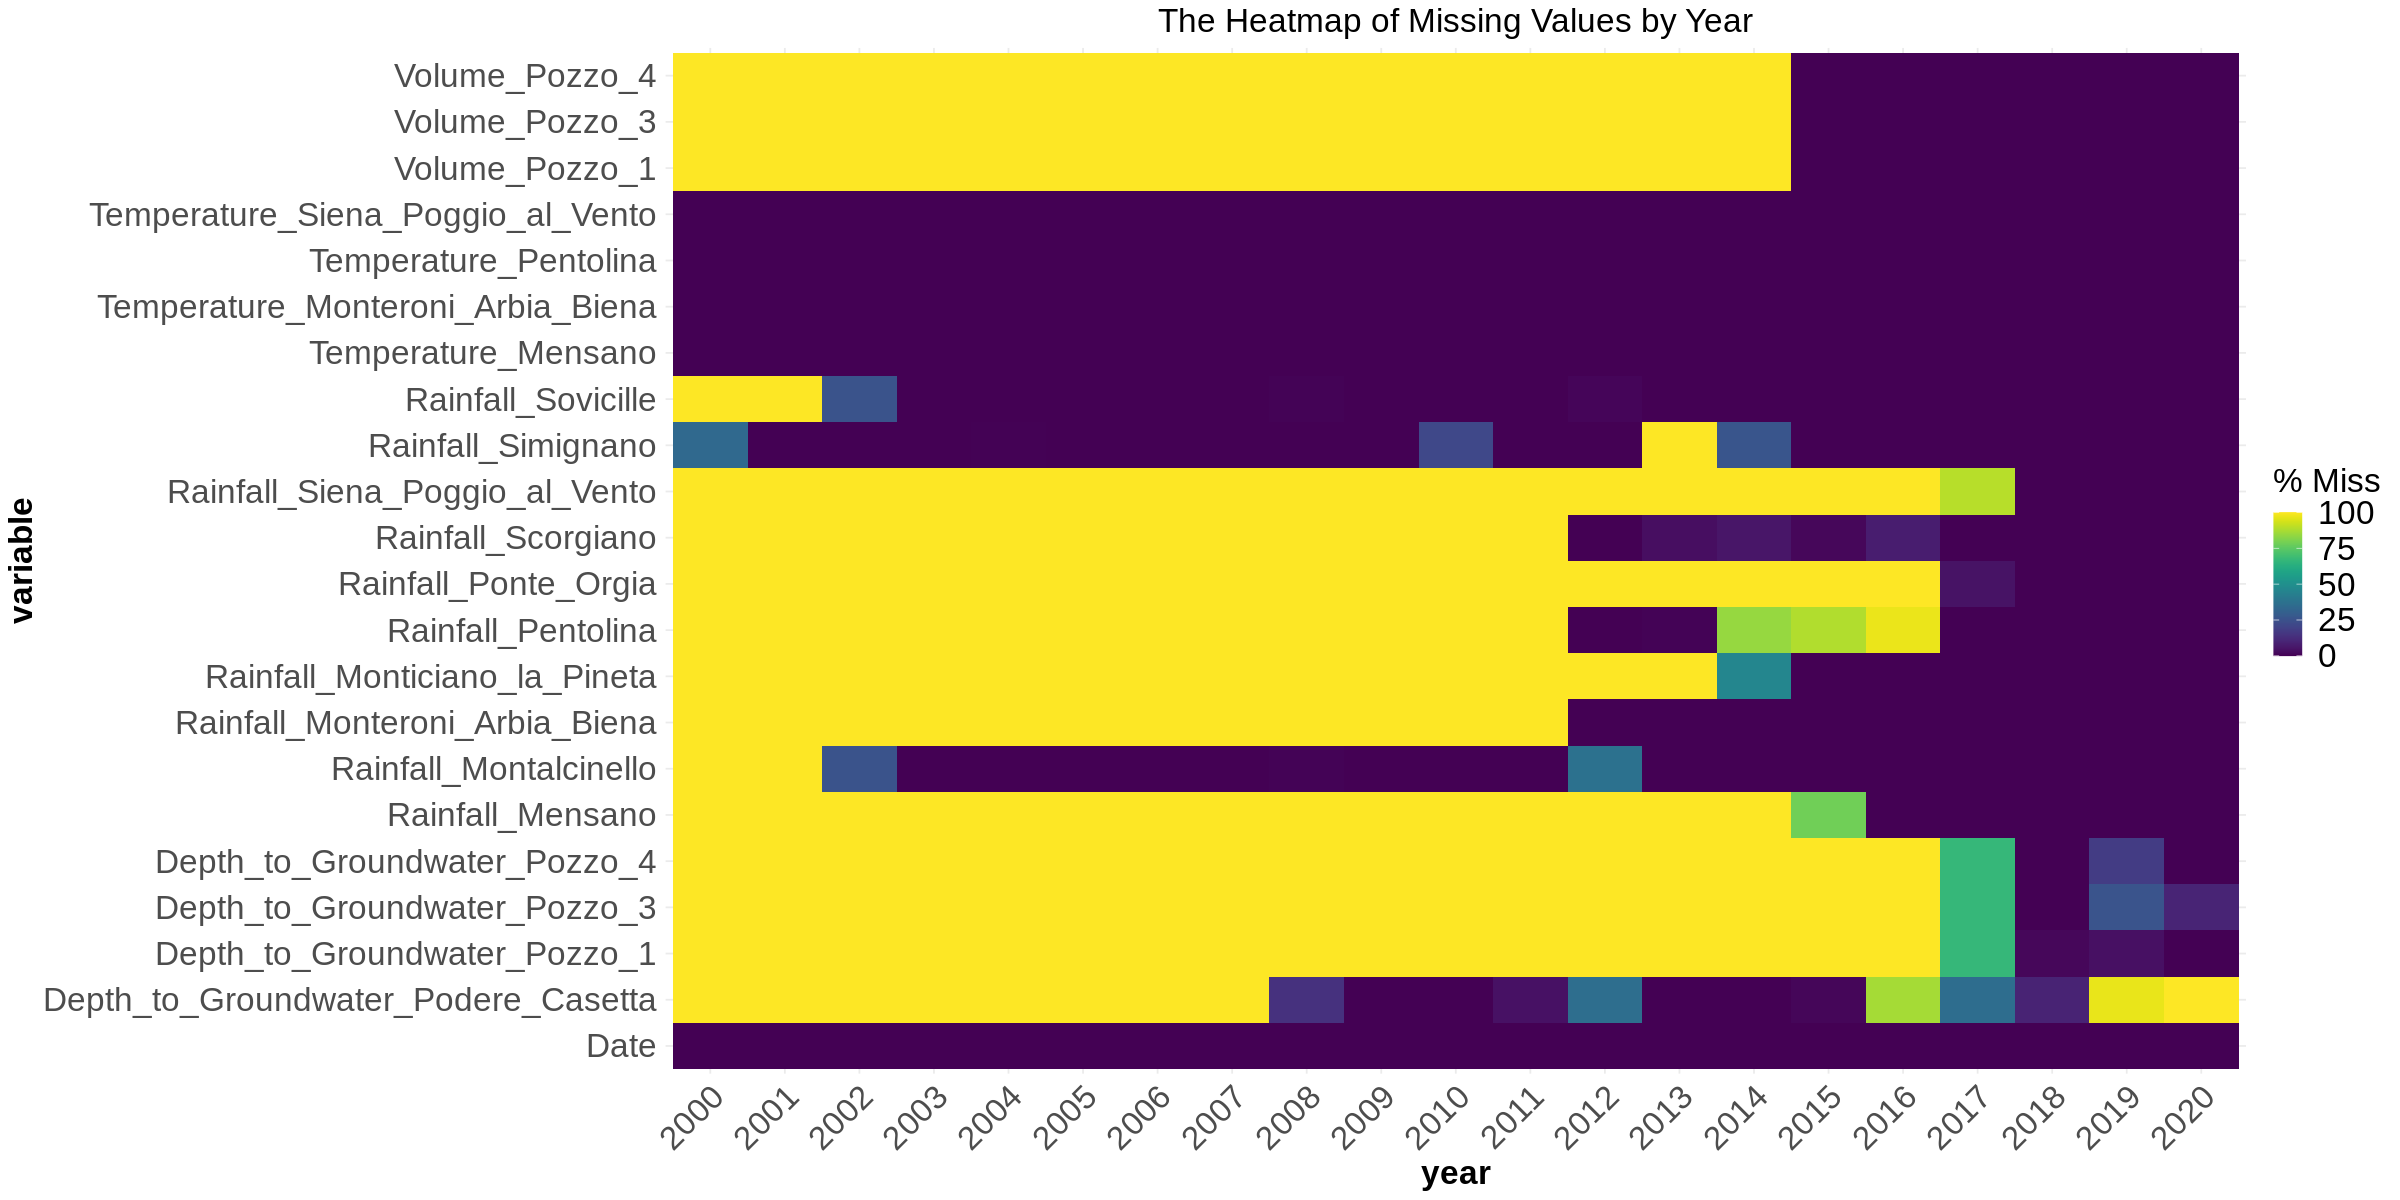

In [195]:
# show the amount of missing values by year
options(repr.plot.width=20, repr.plot.height=10)
gg_miss_fct(luco, fct = year) + ggtitle("The Heatmap of Missing Values by Year") +
 theme(axis.text=element_text(size=20),
        axis.title=element_text(size=20,face="bold"),
        plot.title = element_text(hjust = 0.5, size=20),
        legend.title = element_text(size=20),
        legend.text = element_text(size=20))
ggsave("Missing_by_year.png", device = "png", path="/home/han/Projects/ACEA_Water/Images/") 

### Subset the data

In [184]:
# data shows that the target started in 2008 and ends in 2018 because the data for 2019 and 2020 are missing mostly
luco_subset <- luco %>% filter(Date >= as.Date("2008-01-01") & Date <= as.Date("2018-12-31"))

# As some of the variables have a large portion of missing values, we'll drop them later from the analysis as there are not enough data
# Temperature_Siena_Poggio_al_Vento & Temperature_Mensano are mostly zero in the beginning 
column_of_interest <- c('Date', 'Depth_to_Groundwater_Podere_Casetta', 'Temperature_Pentolina', 'Temperature_Monteroni_Arbia_Biena','Rainfall_Simignano',
                       'Rainfall_Montalcinello', 'Rainfall_Sovicille', 'Rainfall_Scorgiano', 'Rainfall_Pentolina')
luco_subset <- luco_subset[,column_of_interest]
head(luco_subset)

# get the output and the time
luco_output <- luco_subset[,c('Date', 'Depth_to_Groundwater_Podere_Casetta')]

# missing values
miss_var_summary(luco_subset)

,Date,Depth_to_Groundwater_Podere_Casetta,Temperature_Pentolina,Temperature_Monteroni_Arbia_Biena,Rainfall_Simignano,Rainfall_Montalcinello,Rainfall_Sovicille,Rainfall_Scorgiano,Rainfall_Pentolina
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2008-01-01,NA,3.80,0.40,0.0,0.0,0.0,NA,NA
2,2008-01-02,NA,1.55,2.90,0.0,0.0,0.0,NA,NA
3,2008-01-03,NA,0.90,3.00,0.0,5.8,2.0,NA,NA
4,2008-01-04,NA,5.55,6.65,4.0,5.0,2.2,NA,NA
5,2008-01-05,NA,8.25,8.15,2.2,4.0,2.2,NA,NA
6,2008-01-06,NA,9.20,7.60,8.4,6.0,8.4,NA,NA


variable,n_miss,pct_miss
<chr>,<int>,<dbl>
Rainfall_Pentolina,2449,60.950722
Rainfall_Scorgiano,1529,38.053758
Depth_to_Groundwater_Podere_Casetta,684,17.023395
Rainfall_Simignano,540,13.439522
Rainfall_Montalcinello,138,3.434545
Rainfall_Sovicille,6,0.149328
Date,0,0.000000
Temperature_Pentolina,0,0.000000
Temperature_Monteroni_Arbia_Biena,0,0.000000


### As ts object

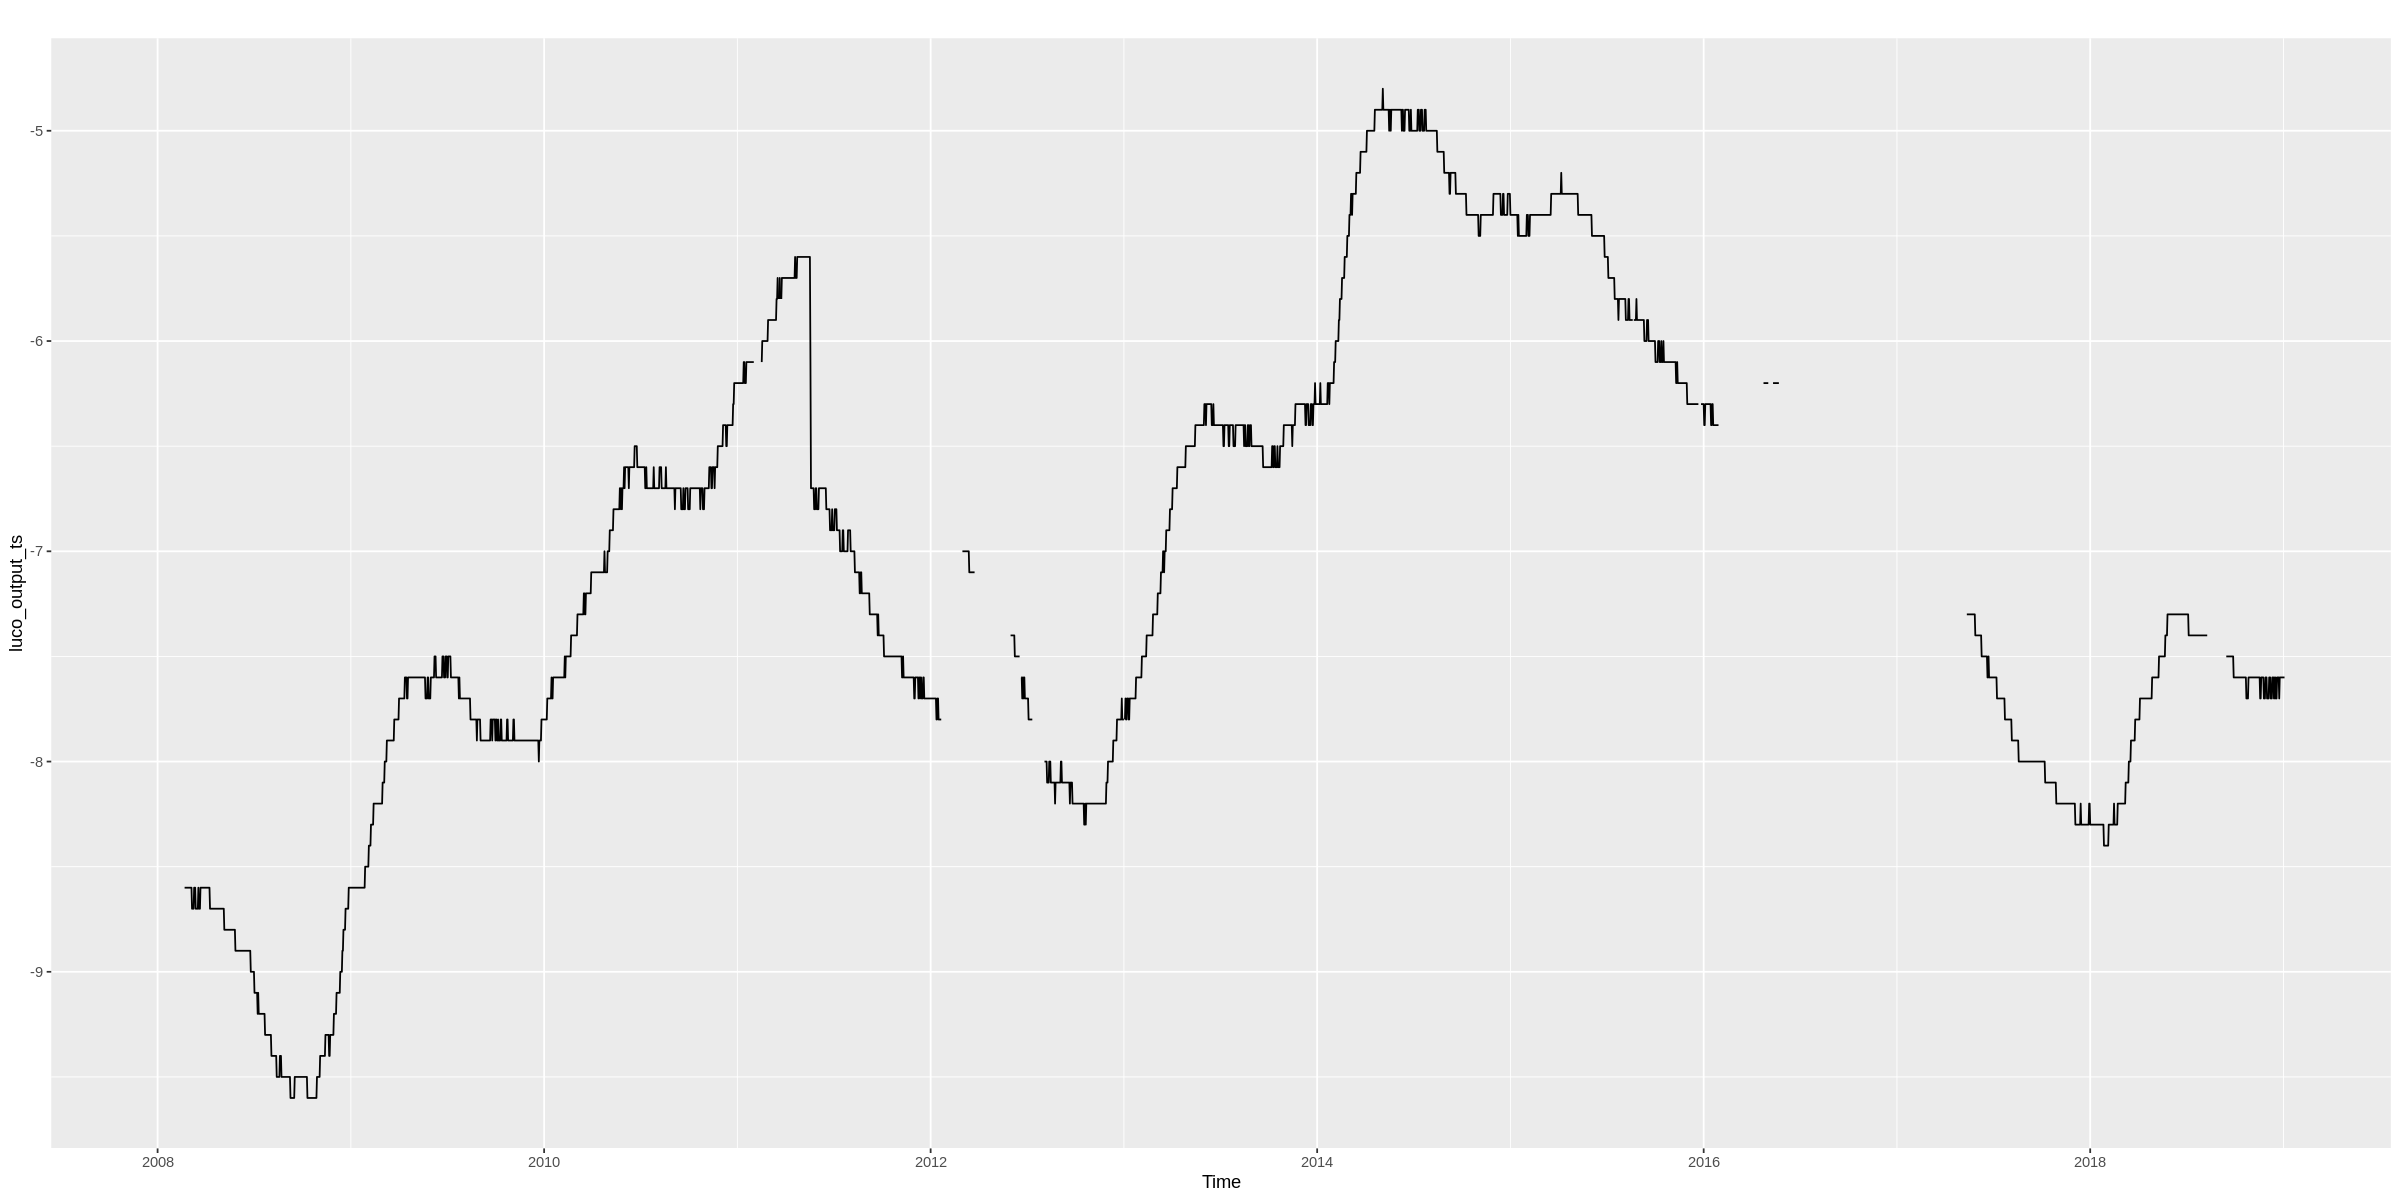

In [119]:
# convert them into ts object
luco_output_ts <- ts(luco_output$Depth_to_Groundwater_Podere_Casetta, start=c(2008, 1), frequency = 365)
autoplot(luco_output_ts)

In [120]:
# check if there's a seasonality to it
seastests::isSeasonal(luco_output_ts)

[1] TRUE

### Imputation

Saving 6.67 x 6.67 in image



The percentage of missing value:  17.02339 


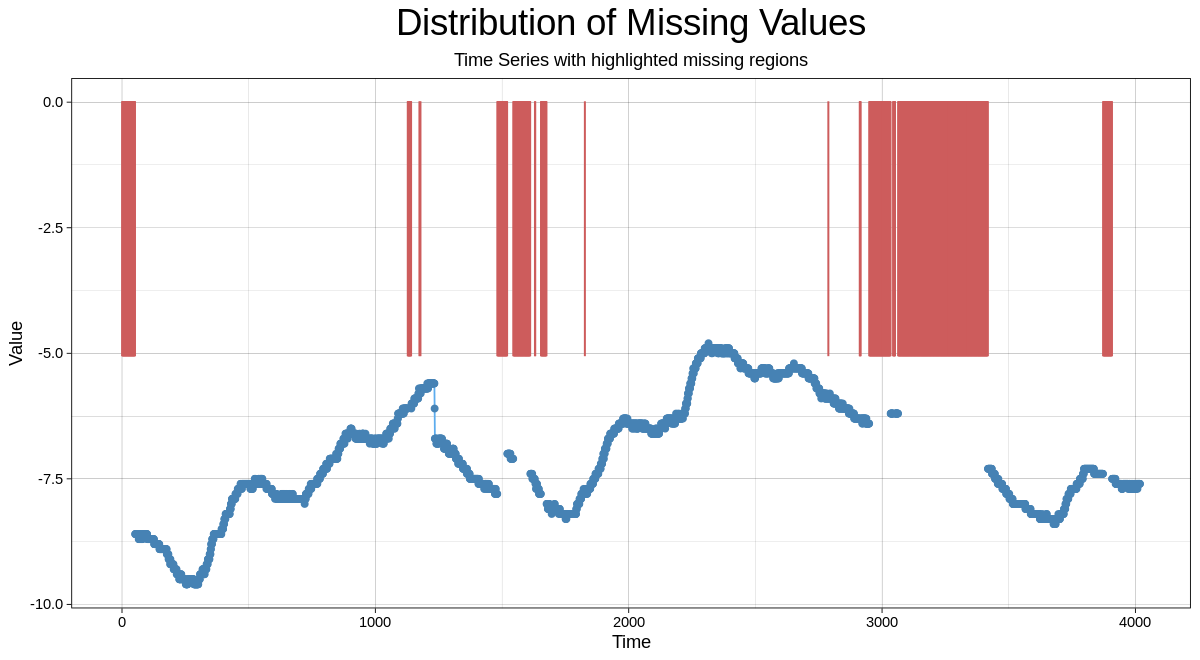

In [198]:
# visualise the gap of na
options(repr.plot.width=10, repr.plot.height=5.5) 
# ggplot_na_distribution(x=luco_output$Depth_to_Groundwater_Podere_Casetta, x_axis_labels = luco_output$Date)
ggplot_na_distribution(luco_output_ts) + 
    ggplot2::theme(plot.title = ggplot2::element_text(hjust = 0.5, size=22)) +
    ggplot2::theme(plot.subtitle = ggplot2::element_text(hjust = 0.5))
ggsave("Missing_values_ts.png", device = "png", path="/home/han/Projects/ACEA_Water/Images/") 
# pct of missing value
cat("The percentage of missing value: ", naniar::pct_miss(luco_output_ts), "\n")

In [122]:
# create a function to visualise the imputed results
viz_impute <- function(original, imputed, title_size, title){
    tmp <- ggplot_na_imputations(original, imputed, title=title) +
                ggplot2::theme(plot.title = ggplot2::element_text(hjust = 0.5, size=title_size)) +
                ggplot2::theme(plot.subtitle = ggplot2::element_text(hjust = 0.5))
    return(tmp)
}

In [123]:
# impute
luco_output_nocb <- na_locf(luco_output_ts,option = "nocb")  # using next observation carried back
luco_output_mean <- na_mean(luco_output_ts,option = "mean")  # using mean
luco_output_median <- na_mean(luco_output_ts,option = "median")  # using median
luco_output_exp <- na_ma(luco_output_ts,weighting = "exponential")  # using exponential weighted moving average
luco_output_spline <- na_interpolation(luco_output_ts,option = "spline")  # using spline interpolation
luco_output_stineman <- na_interpolation(luco_output_ts,option = "stine")  # using stineman interpolation
luco_output_linear <- na_interpolation(luco_output_ts,option = "linear")  # using linear interpolation, probably not the right approach
luco_output_seadec <- na_seadec(luco_output_ts)  # use seasonal decompostion
luco_output_seasplit <- na_seasplit(luco_output_ts)  # use seasonally splitted

Saving 6.67 x 6.67 in image



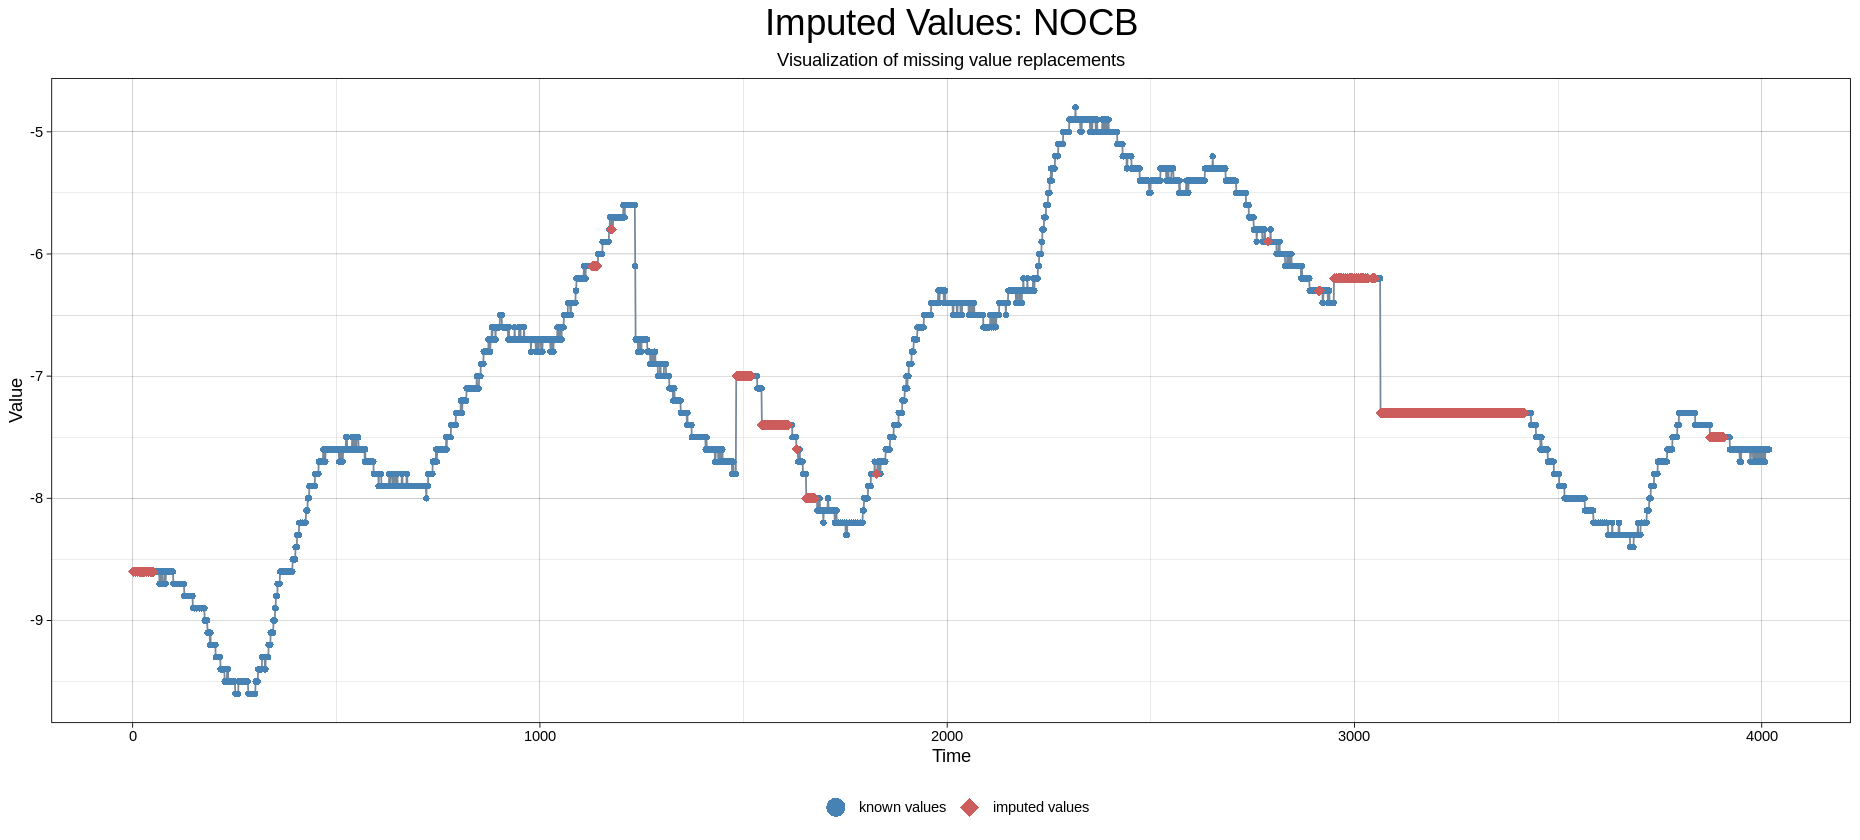

In [124]:
# next observation carried backward
options(repr.plot.width=15.5, repr.plot.height=7) 
luco_output_nocb <- na_locf(luco_output_ts,option = "nocb")
viz_impute(original=luco_output_ts, imputed=luco_output_nocb, 22, title="Imputed Values: NOCB")
ggsave("imp_nocb.png", device = "png", path="/home/han/Projects/ACEA_Water/Images/")

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



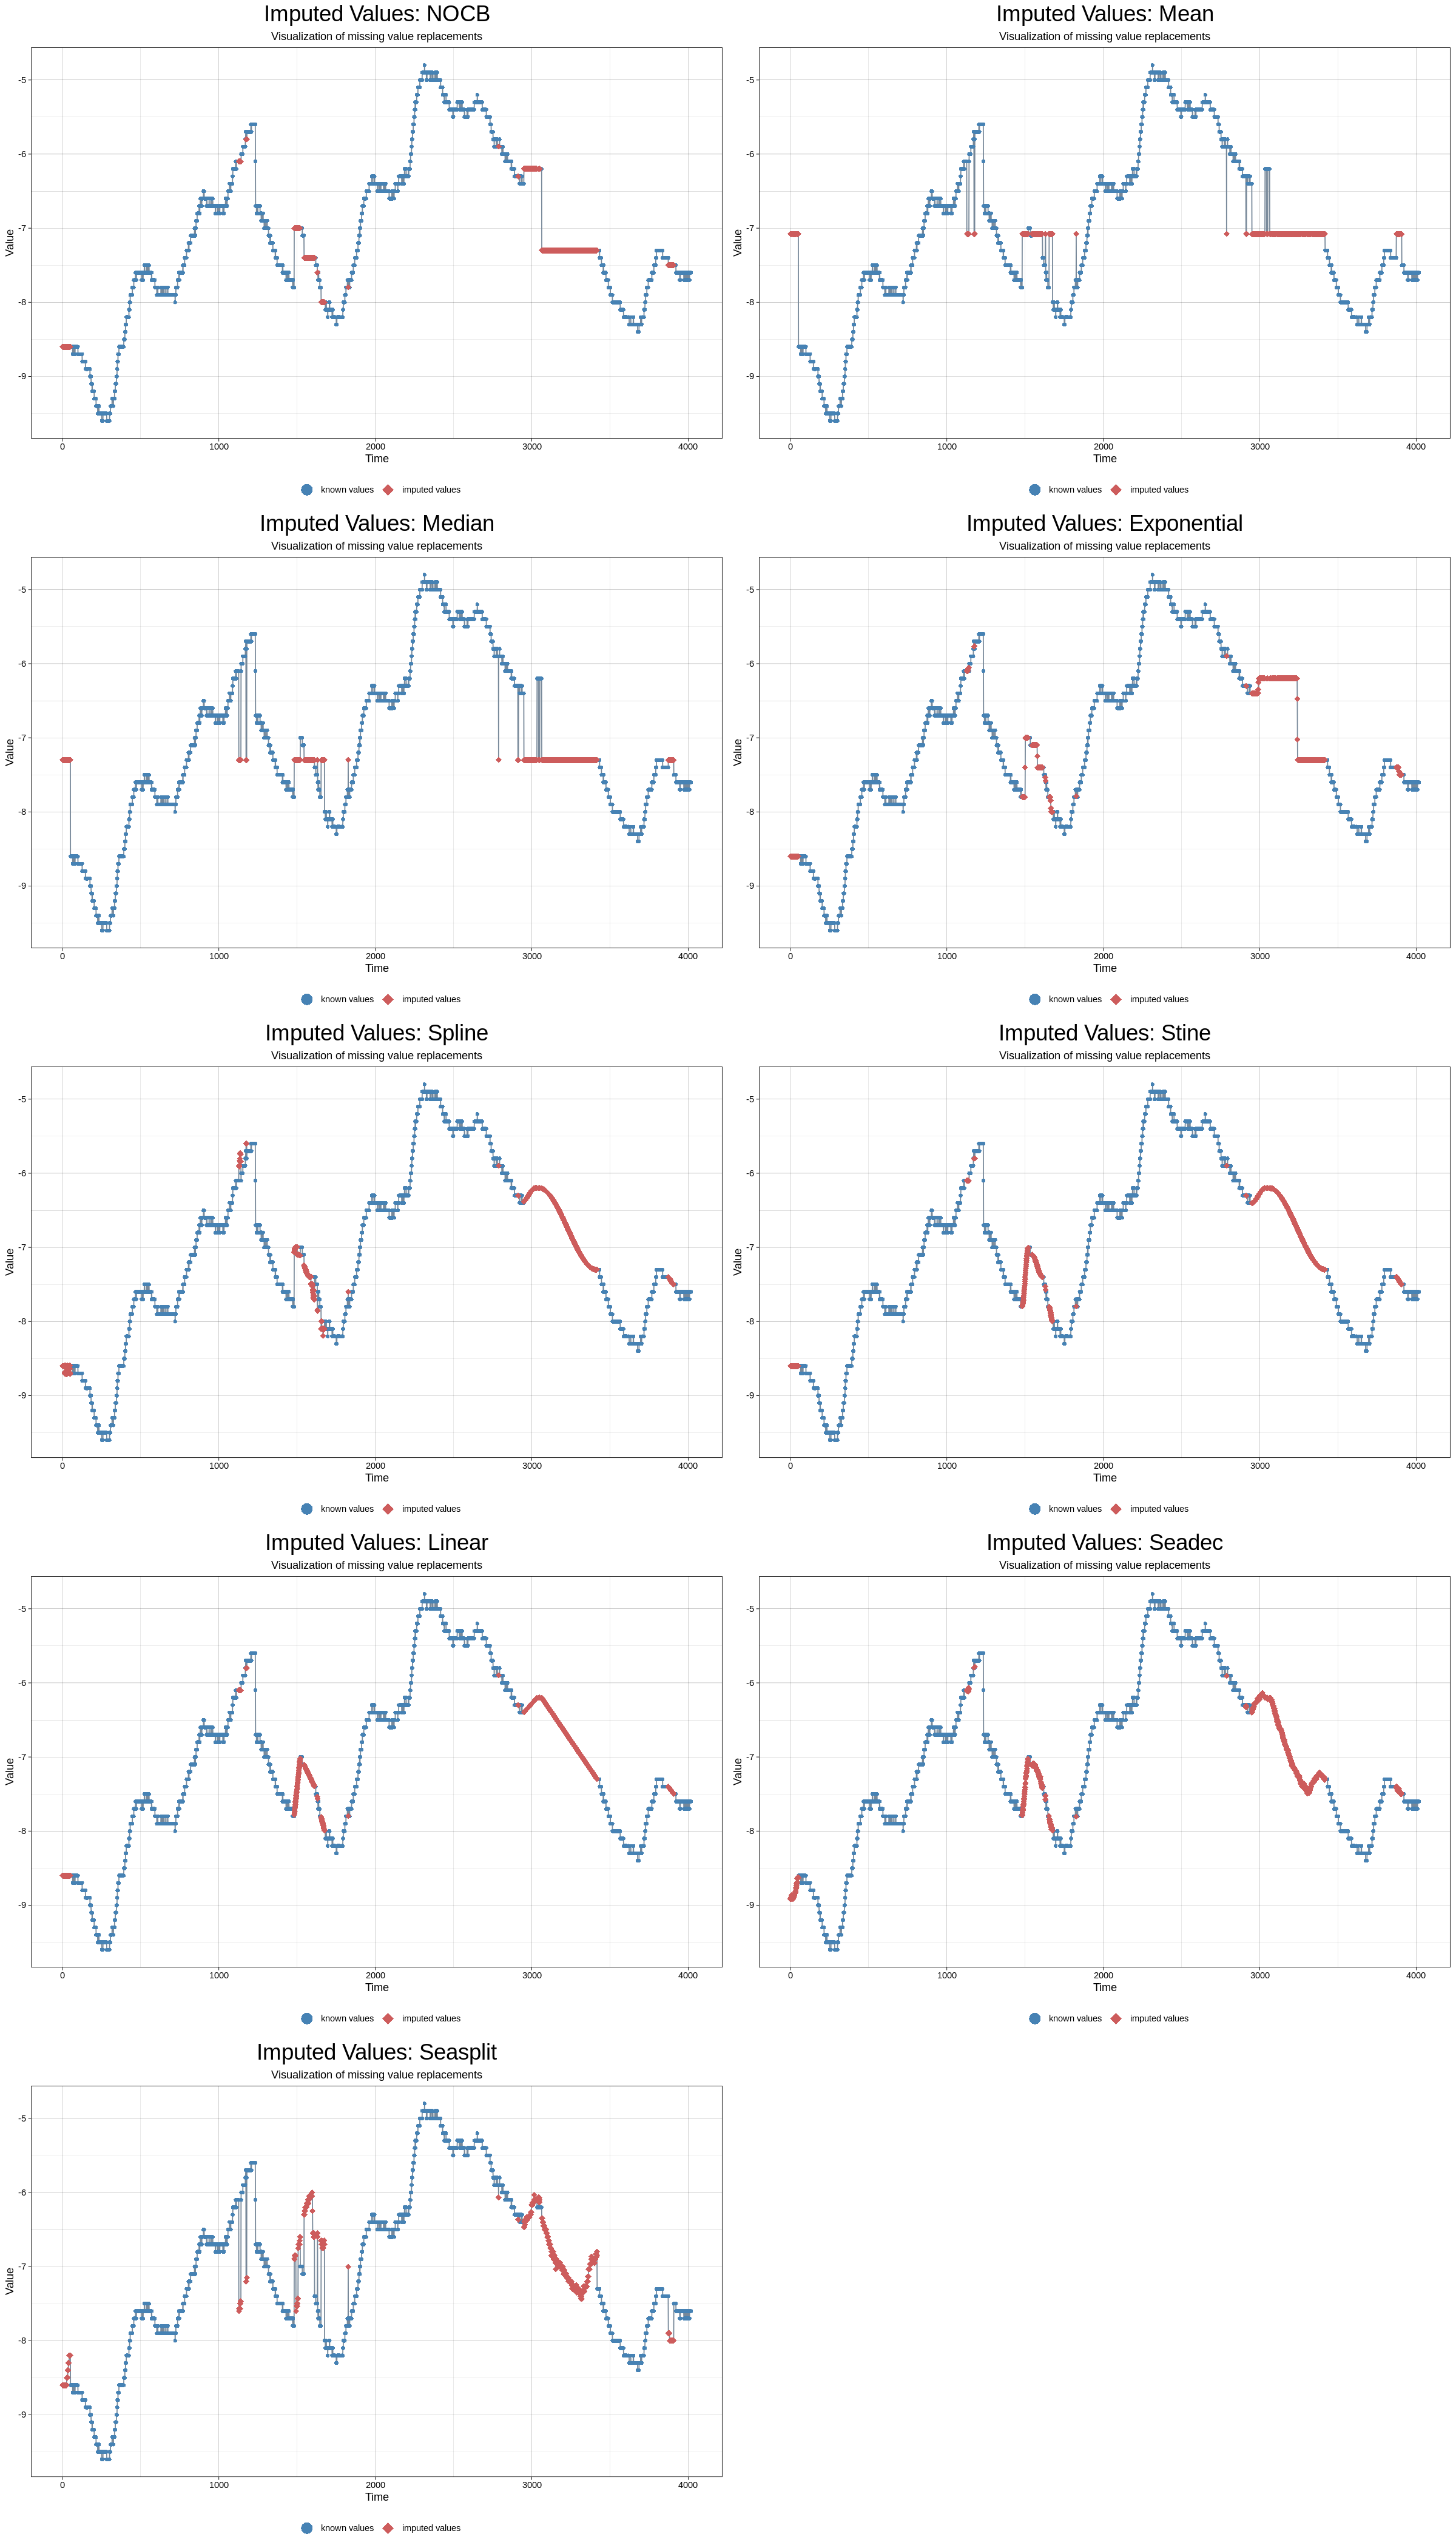

In [197]:
# visualise imputed value
options(repr.plot.width=20, repr.plot.height=35) 
plot1 <- viz_impute(original=luco_output_ts, luco_output_nocb, 22, title="Imputed Values: NOCB")
ggsave("imp_nocb.png", device = "png", path="/home/han/Projects/ACEA_Water/Images/")
plot2 <- viz_impute(original=luco_output_ts, luco_output_mean, 22, title="Imputed Values: Mean")
ggsave("imp_mean.png", device = "png", path="/home/han/Projects/ACEA_Water/Images/")
plot3 <- viz_impute(original=luco_output_ts, luco_output_median, 22, title="Imputed Values: Median")
plot4 <- viz_impute(original=luco_output_ts, luco_output_exp, 22, title="Imputed Values: Exponential")
ggsave("imp_ewma.png", device = "png", path="/home/han/Projects/ACEA_Water/Images/")
plot5 <- viz_impute(original=luco_output_ts, luco_output_spline, 22, title="Imputed Values: Spline")
plot6 <- viz_impute(original=luco_output_ts, luco_output_stineman, 22, title="Imputed Values: Stine")  
ggsave("imp_stineman.png", device = "png", path="/home/han/Projects/ACEA_Water/Images/")
plot7 <- viz_impute(original=luco_output_ts, luco_output_linear, 22, title="Imputed Values: Linear")
ggsave("imp_linear.png", device = "png", path="/home/han/Projects/ACEA_Water/Images/")
plot8 <- viz_impute(original=luco_output_ts, luco_output_seadec, 22, title="Imputed Values: Seadec")  # seasonal decomposed graph looks the best and also make sense if there's a seasonal component
ggsave("imp_seadec.png", device = "png", path="/home/han/Projects/ACEA_Water/Images/")          
plot9 <- viz_impute(original=luco_output_ts, luco_output_seasplit, 22, title="Imputed Values: Seasplit")
grid.arrange(plot1, plot2,plot3,plot4, plot5, plot6, plot7, plot8, plot9, ncol=2 )

In [127]:
# # impute the whole dataframe of interest
# luco_subset_seadec <- na_seadec(luco_subset_ts)
# tsbox:(luco_subset_seadec)

## Exploratory Data Analysis

In [128]:
# summary of the imputed data
summary(luco_output_seadec)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -9.600  -7.800  -7.254  -7.085  -6.300  -4.800 

In [129]:
# summary of the dataset
summary(luco_subset)

      Date            Depth_to_Groundwater_Podere_Casetta Temperature_Pentolina
 Min.   :2008-01-01   Min.   :-9.600                      Min.   :-4.800       
 1st Qu.:2010-10-01   1st Qu.:-7.900                      1st Qu.: 7.662       
 Median :2013-07-01   Median :-7.300                      Median :13.025       
 Mean   :2013-07-01   Mean   :-7.077                      Mean   :13.247       
 3rd Qu.:2016-03-31   3rd Qu.:-6.300                      3rd Qu.:19.238       
 Max.   :2018-12-31   Max.   :-4.800                      Max.   :31.300       
                      NA's   :684                                              
 Temperature_Monteroni_Arbia_Biena Rainfall_Simignano Rainfall_Montalcinello
 Min.   :-3.60                     Min.   : 0.00      Min.   :  0.000       
 1st Qu.: 8.15                     1st Qu.: 0.00      1st Qu.:  0.000       
 Median :13.75                     Median : 0.00      Median :  0.000       
 Mean   :13.81                     Mean   : 2.58    

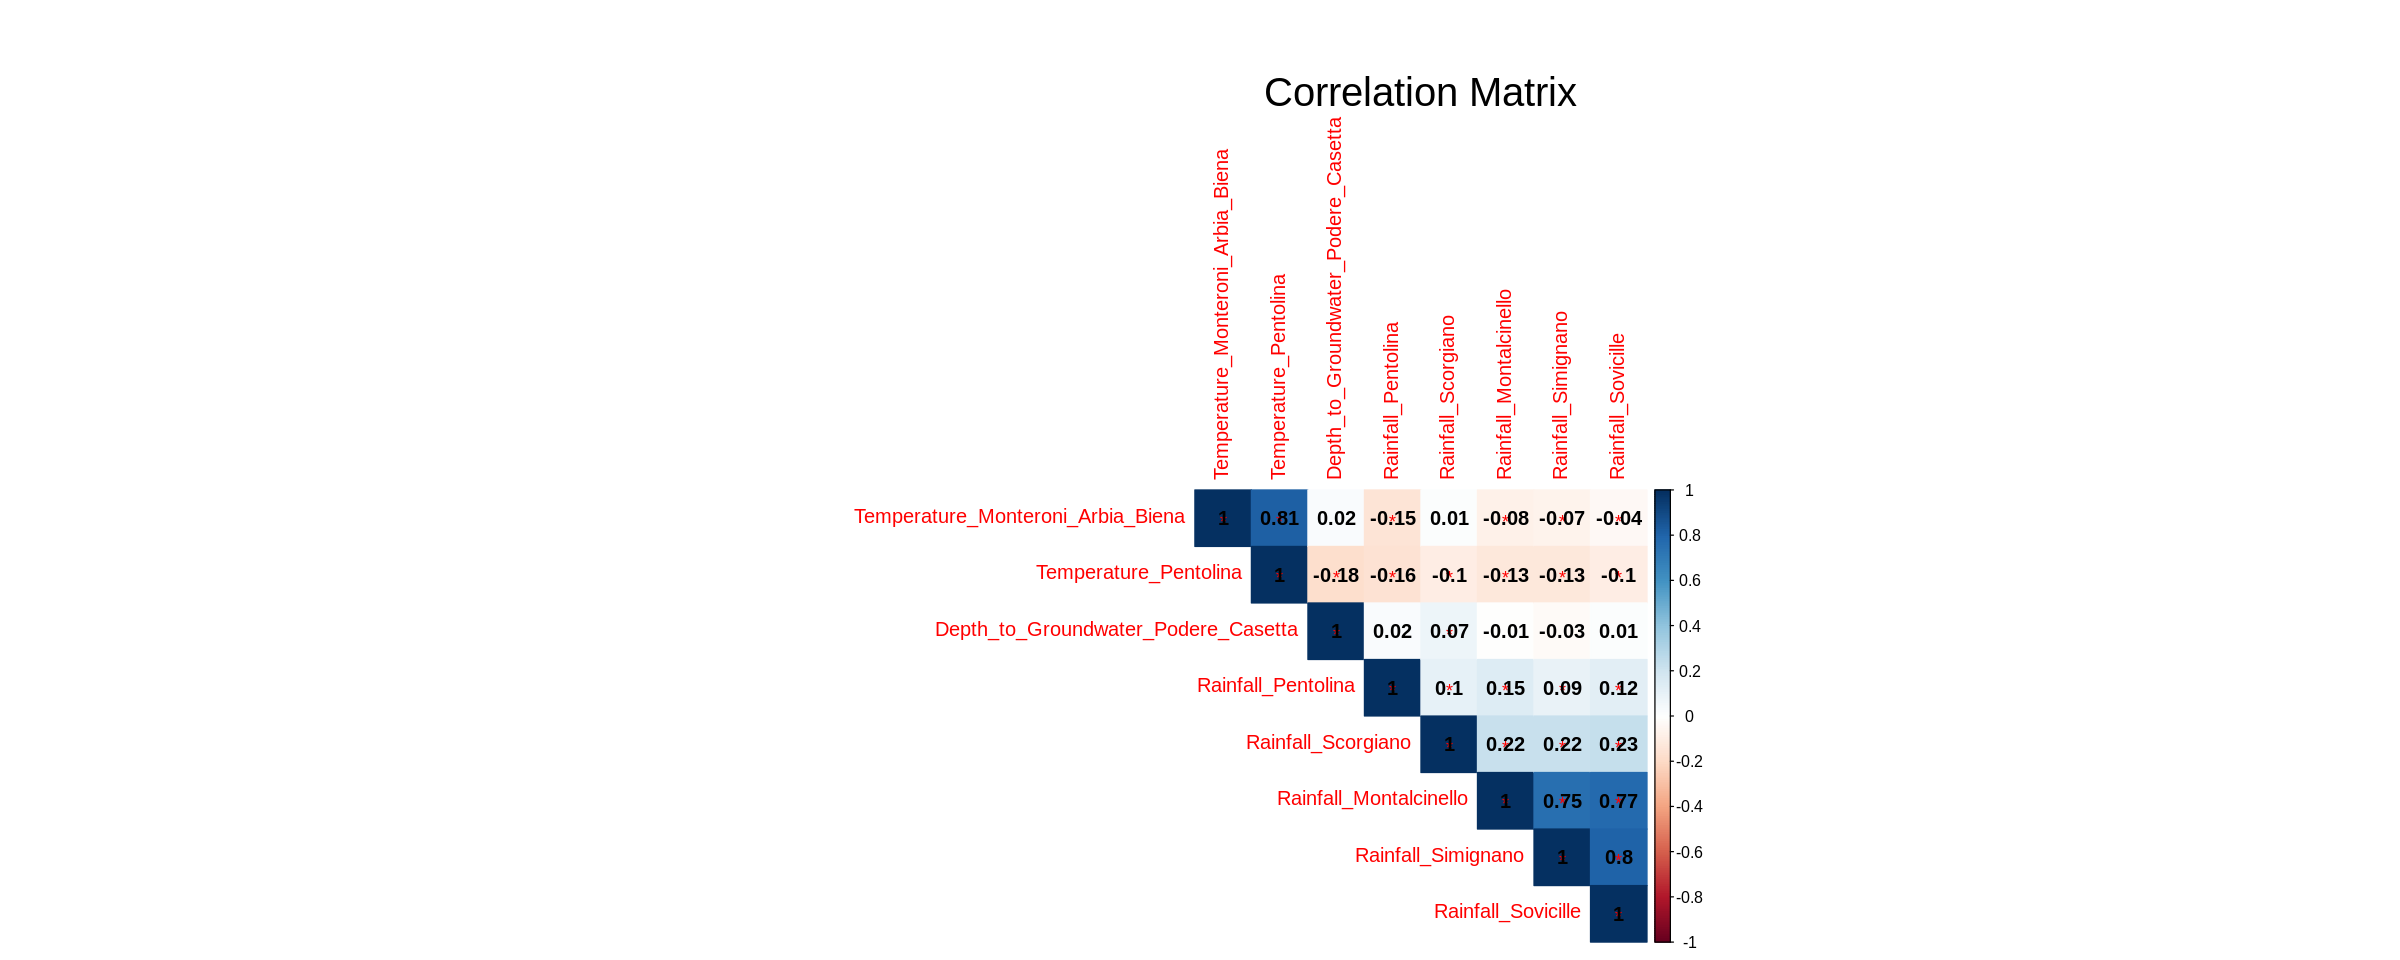

Saving 6.67 x 6.67 in image



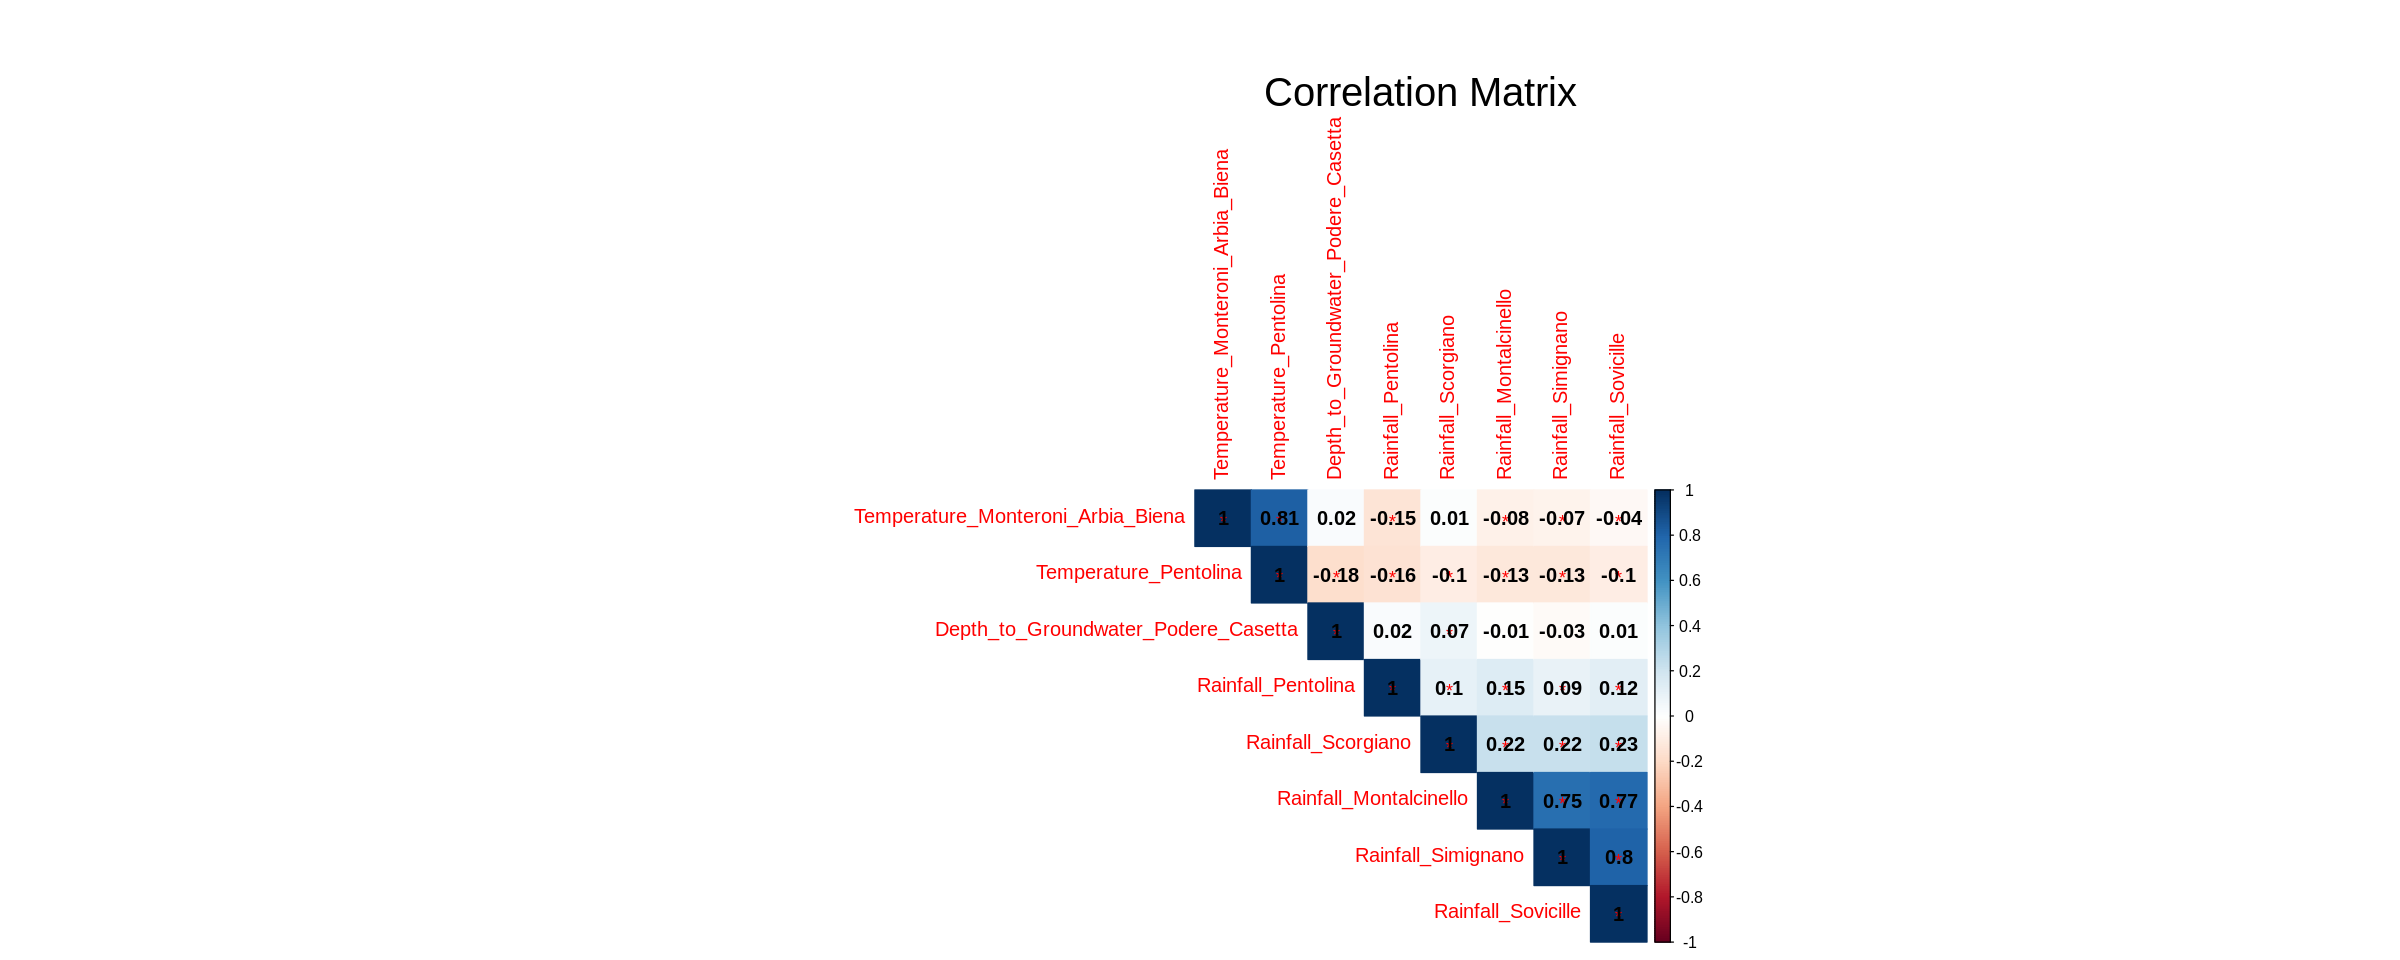

In [202]:
# correlation matrix
options(repr.plot.width=20, repr.plot.height=8)
cormat <- round(cor(luco_subset[,-1], use = "pairwise.complete.obs"),2)
res1 <- cor.mtest(luco_subset[,-1], conf.level = .95)
corrplot::corrplot(cormat, p.mat = res1$p, method = "color", type = "upper",
         sig.level = 0.05, pch.cex = .9, addCoef.col = "black", 
         insig = "label_sig", pch.col = "red", order = "AOE")
mtext("Correlation Matrix", at=4.5, line=-0.5, cex=2)
recordPlot()
# png("correlation_plot.png")
ggsave("correlation_plot.png", device = "png", path="/home/han/Projects/ACEA_Water/Images/") 
# Temperature Monteroni is hightly correlated with Temperature of Pentolina
# Rainfall at Montalcinello is highly correlated with rainfull of Siminnano and Sovicelle

Saving 6.67 x 6.67 in image



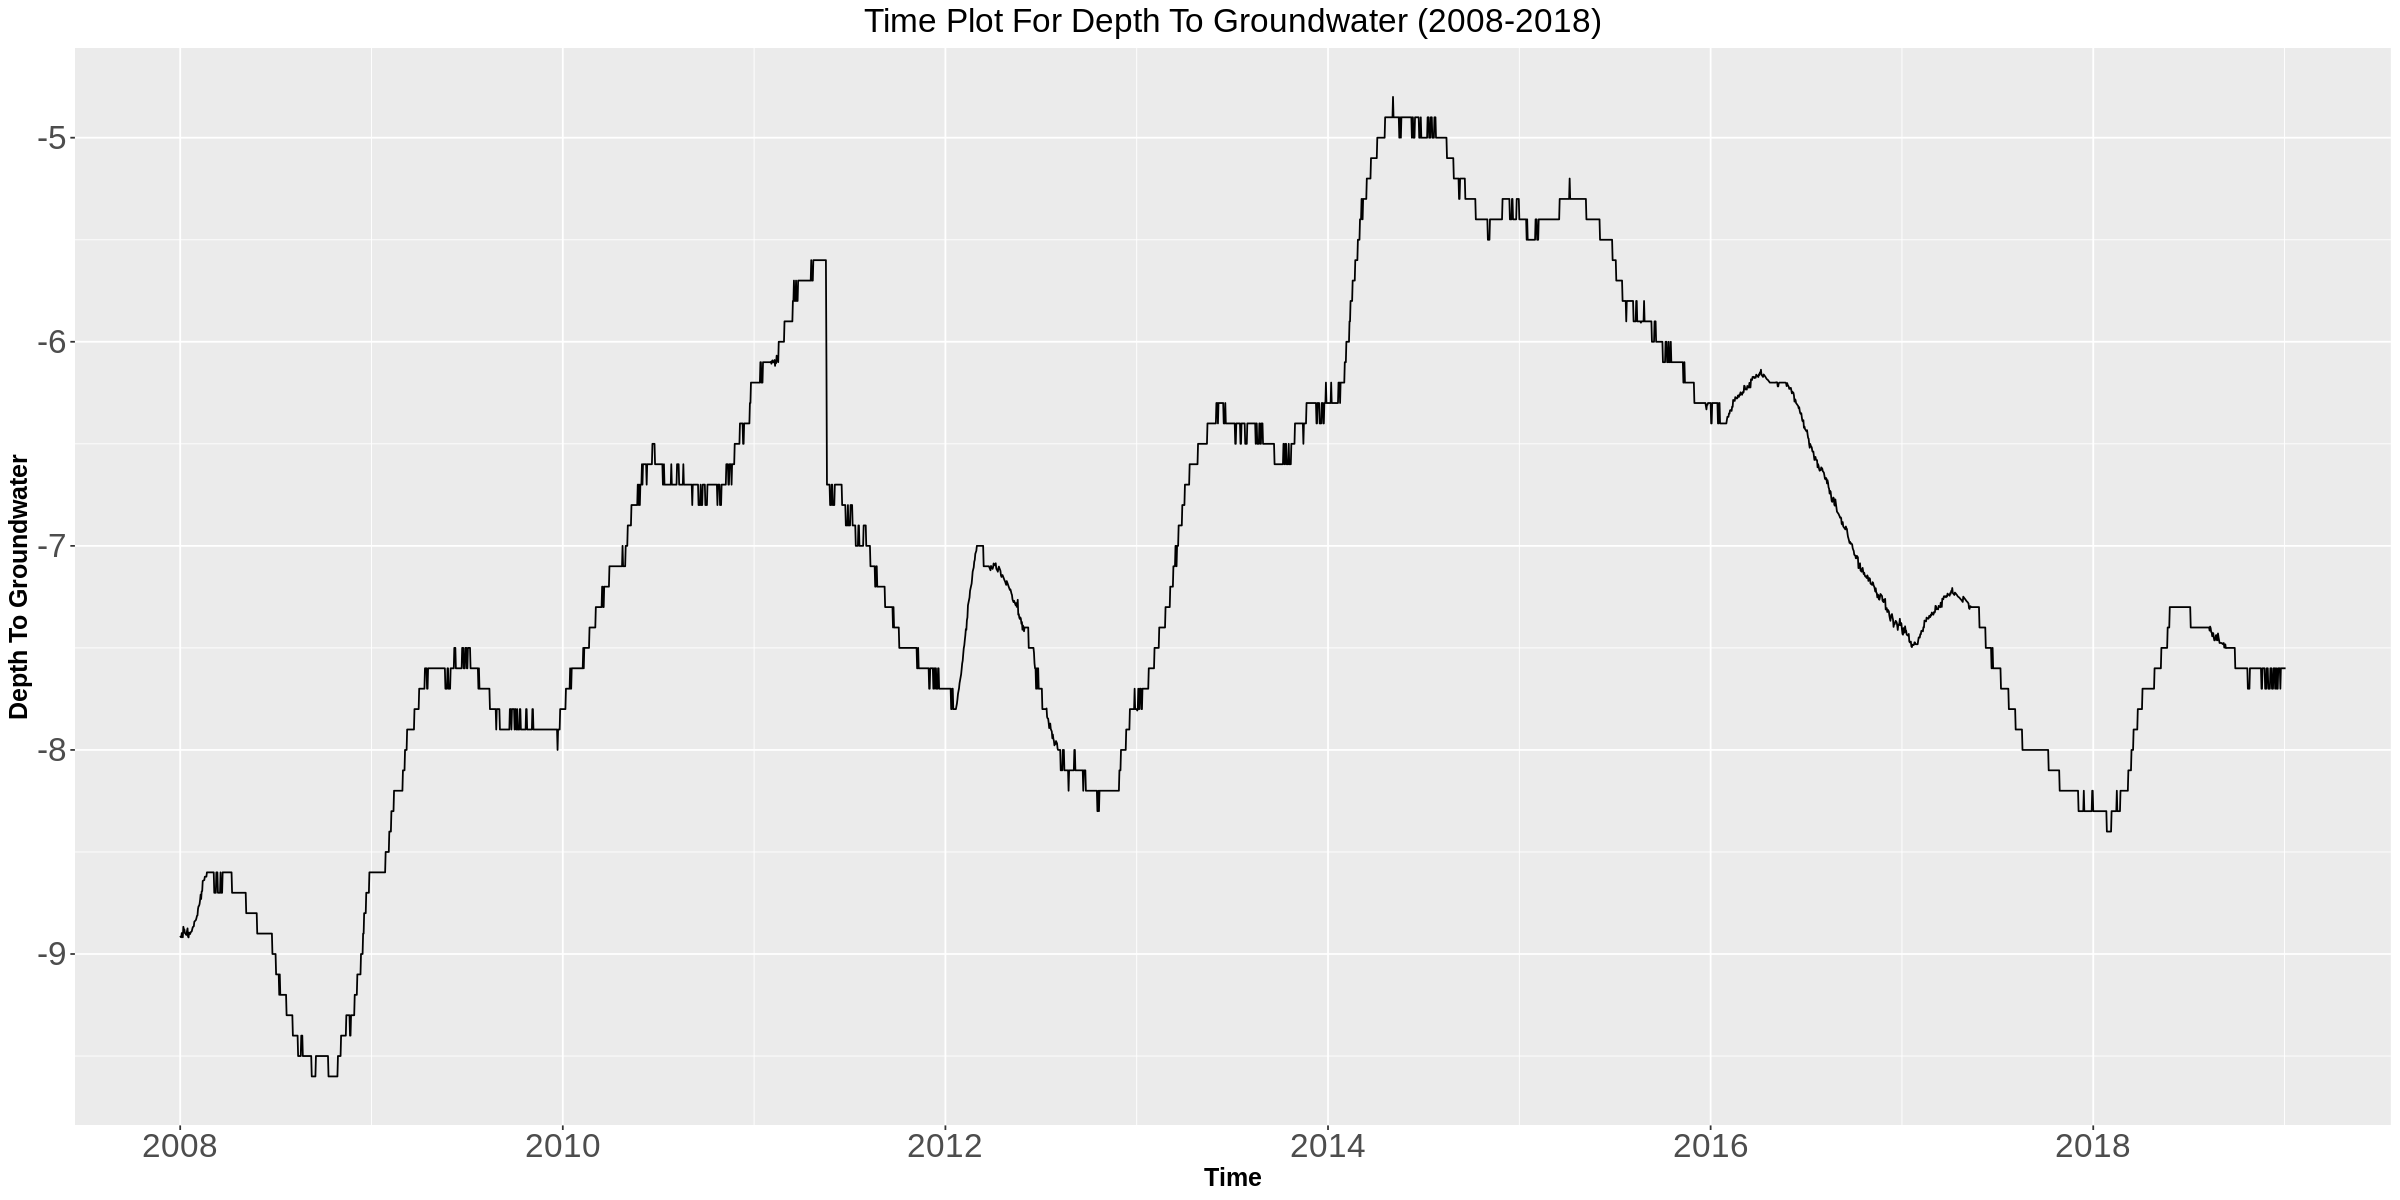

In [131]:
# explore time plot
options(repr.plot.width=20, repr.plot.height=10)
autoplot(luco_output_seadec,ylab="Depth To Groundwater") + ggtitle("Time Plot For Depth To Groundwater (2008-2018)") +
    theme(axis.text=element_text(size=20),
        axis.title=element_text(size=15,face="bold"),
         plot.title = element_text(hjust = 0.5, size=20))
ggsave("Time_plot.png", device = "png", path="/home/han/Projects/ACEA_Water/Images/") 

Saving 6.67 x 6.67 in image



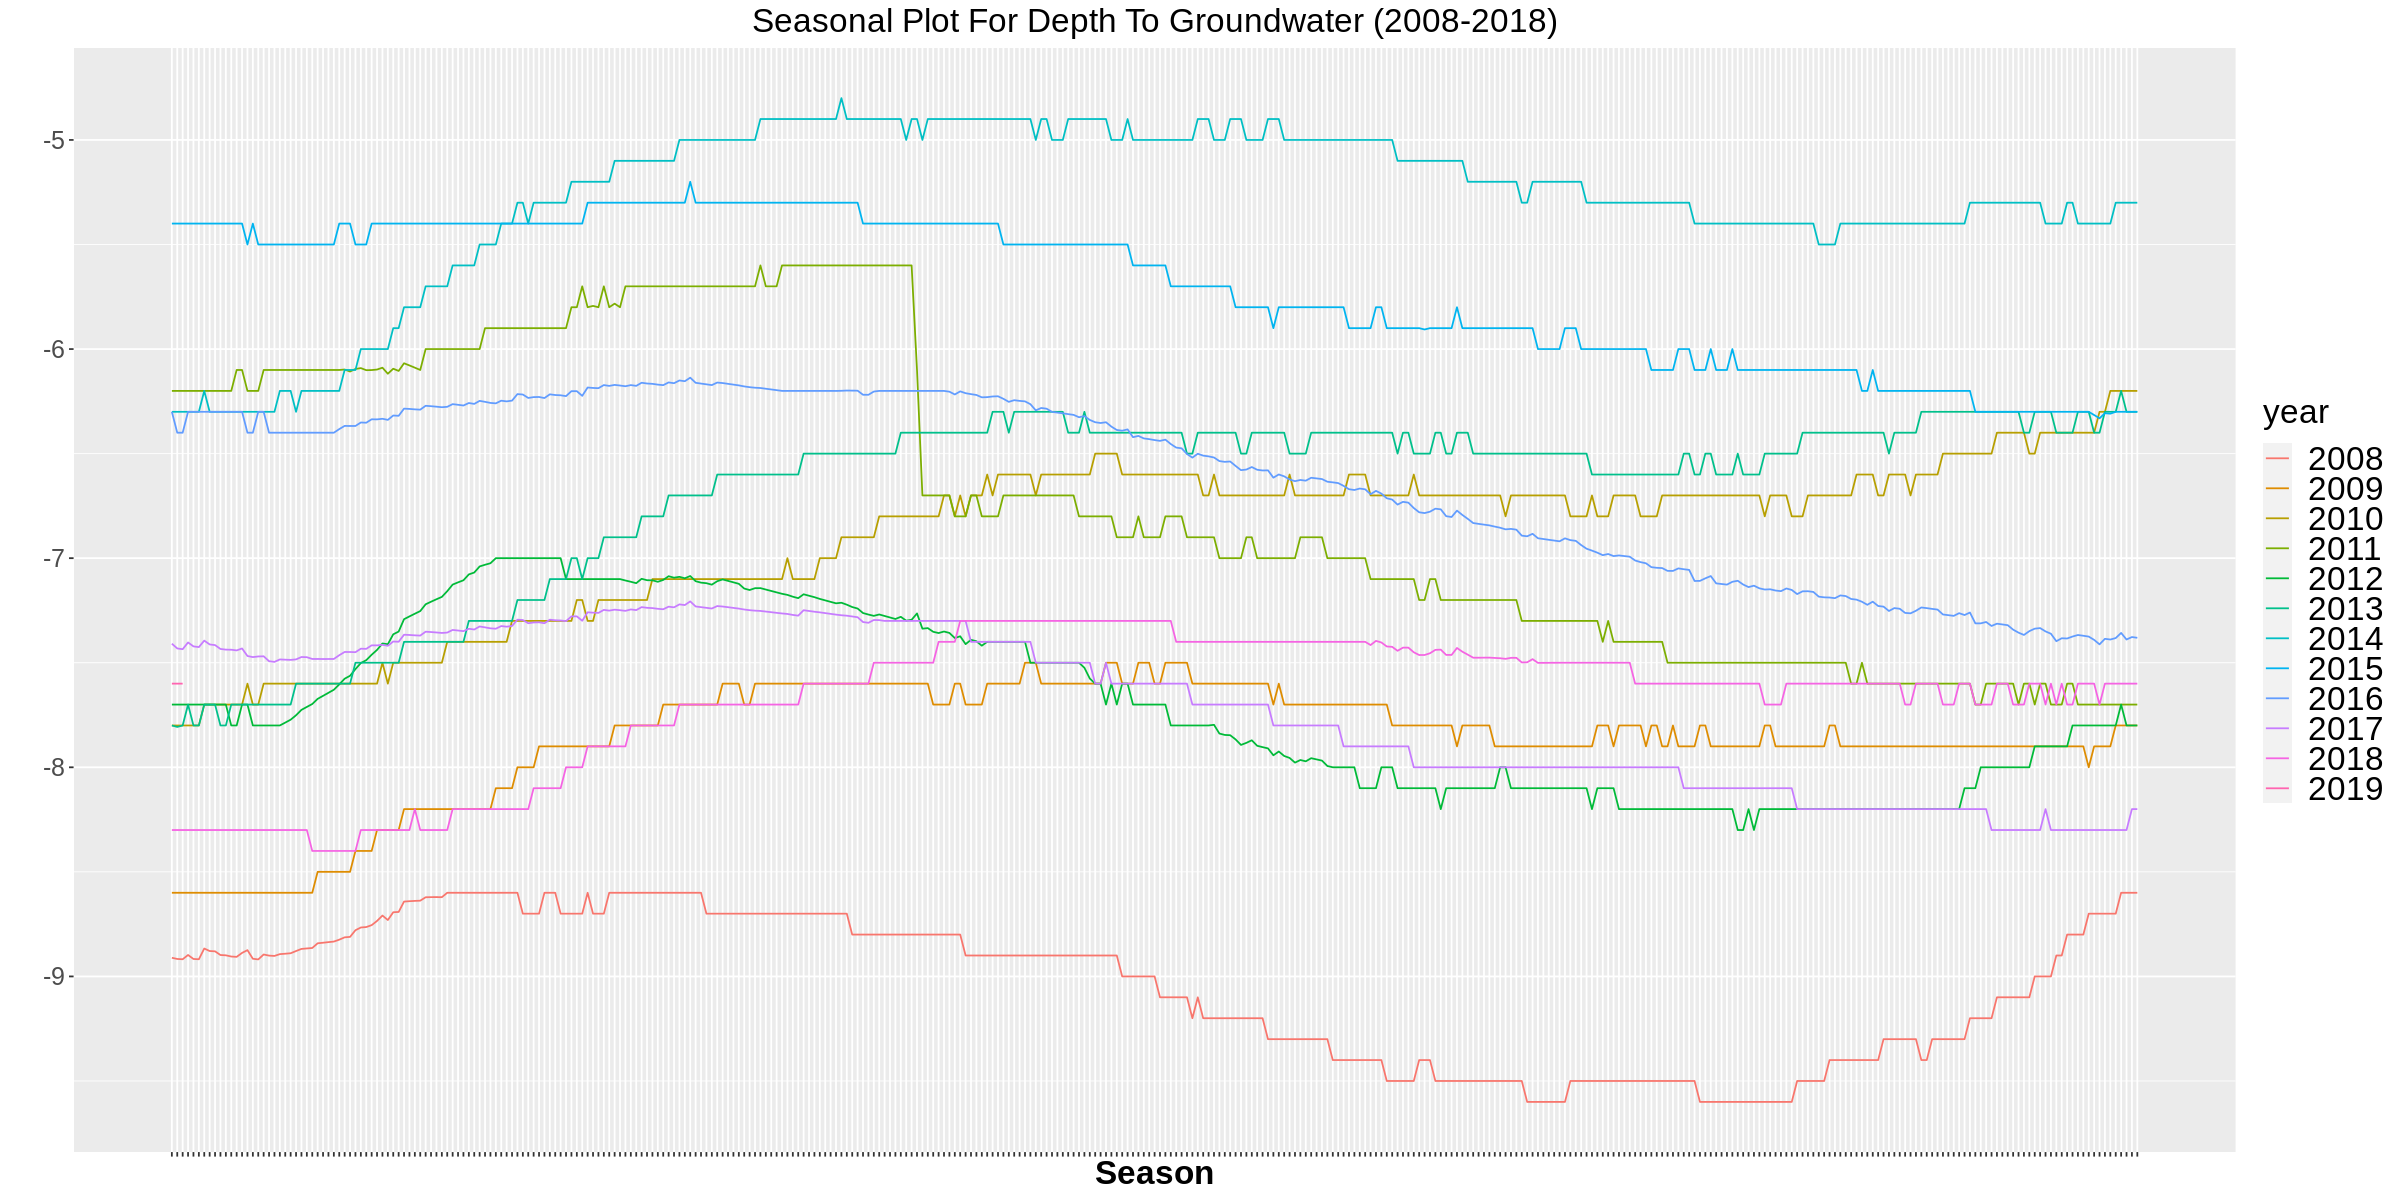

In [171]:
# explore seasonality
ggseasonplot(luco_output_seadec) + 
    ggtitle("Seasonal Plot For Depth To Groundwater (2008-2018)") +
    theme(axis.text.x=element_blank(),
        axis.text.y=element_text(size=15),
        axis.title=element_text(size=20,face="bold"),
        plot.title = element_text(hjust = 0.5, size=20),
        legend.title = element_text(size=20),
        legend.text = element_text(size=20))
ggsave("Seasonal_plot.png", device = "png", path="/home/han/Projects/ACEA_Water/Images/") 
# In each year, the depth seems to shortended and then gradually increase around Q3 and climbed slowly near the end of the year.

## Time Series Analysis

### Stationarity Analysis

In [133]:
# test the stationarity first
summary(ur.kpss(luco_output_seadec))  # it's definitely not stationary


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 10 lags. 

Value of test-statistic is: 8.6883 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


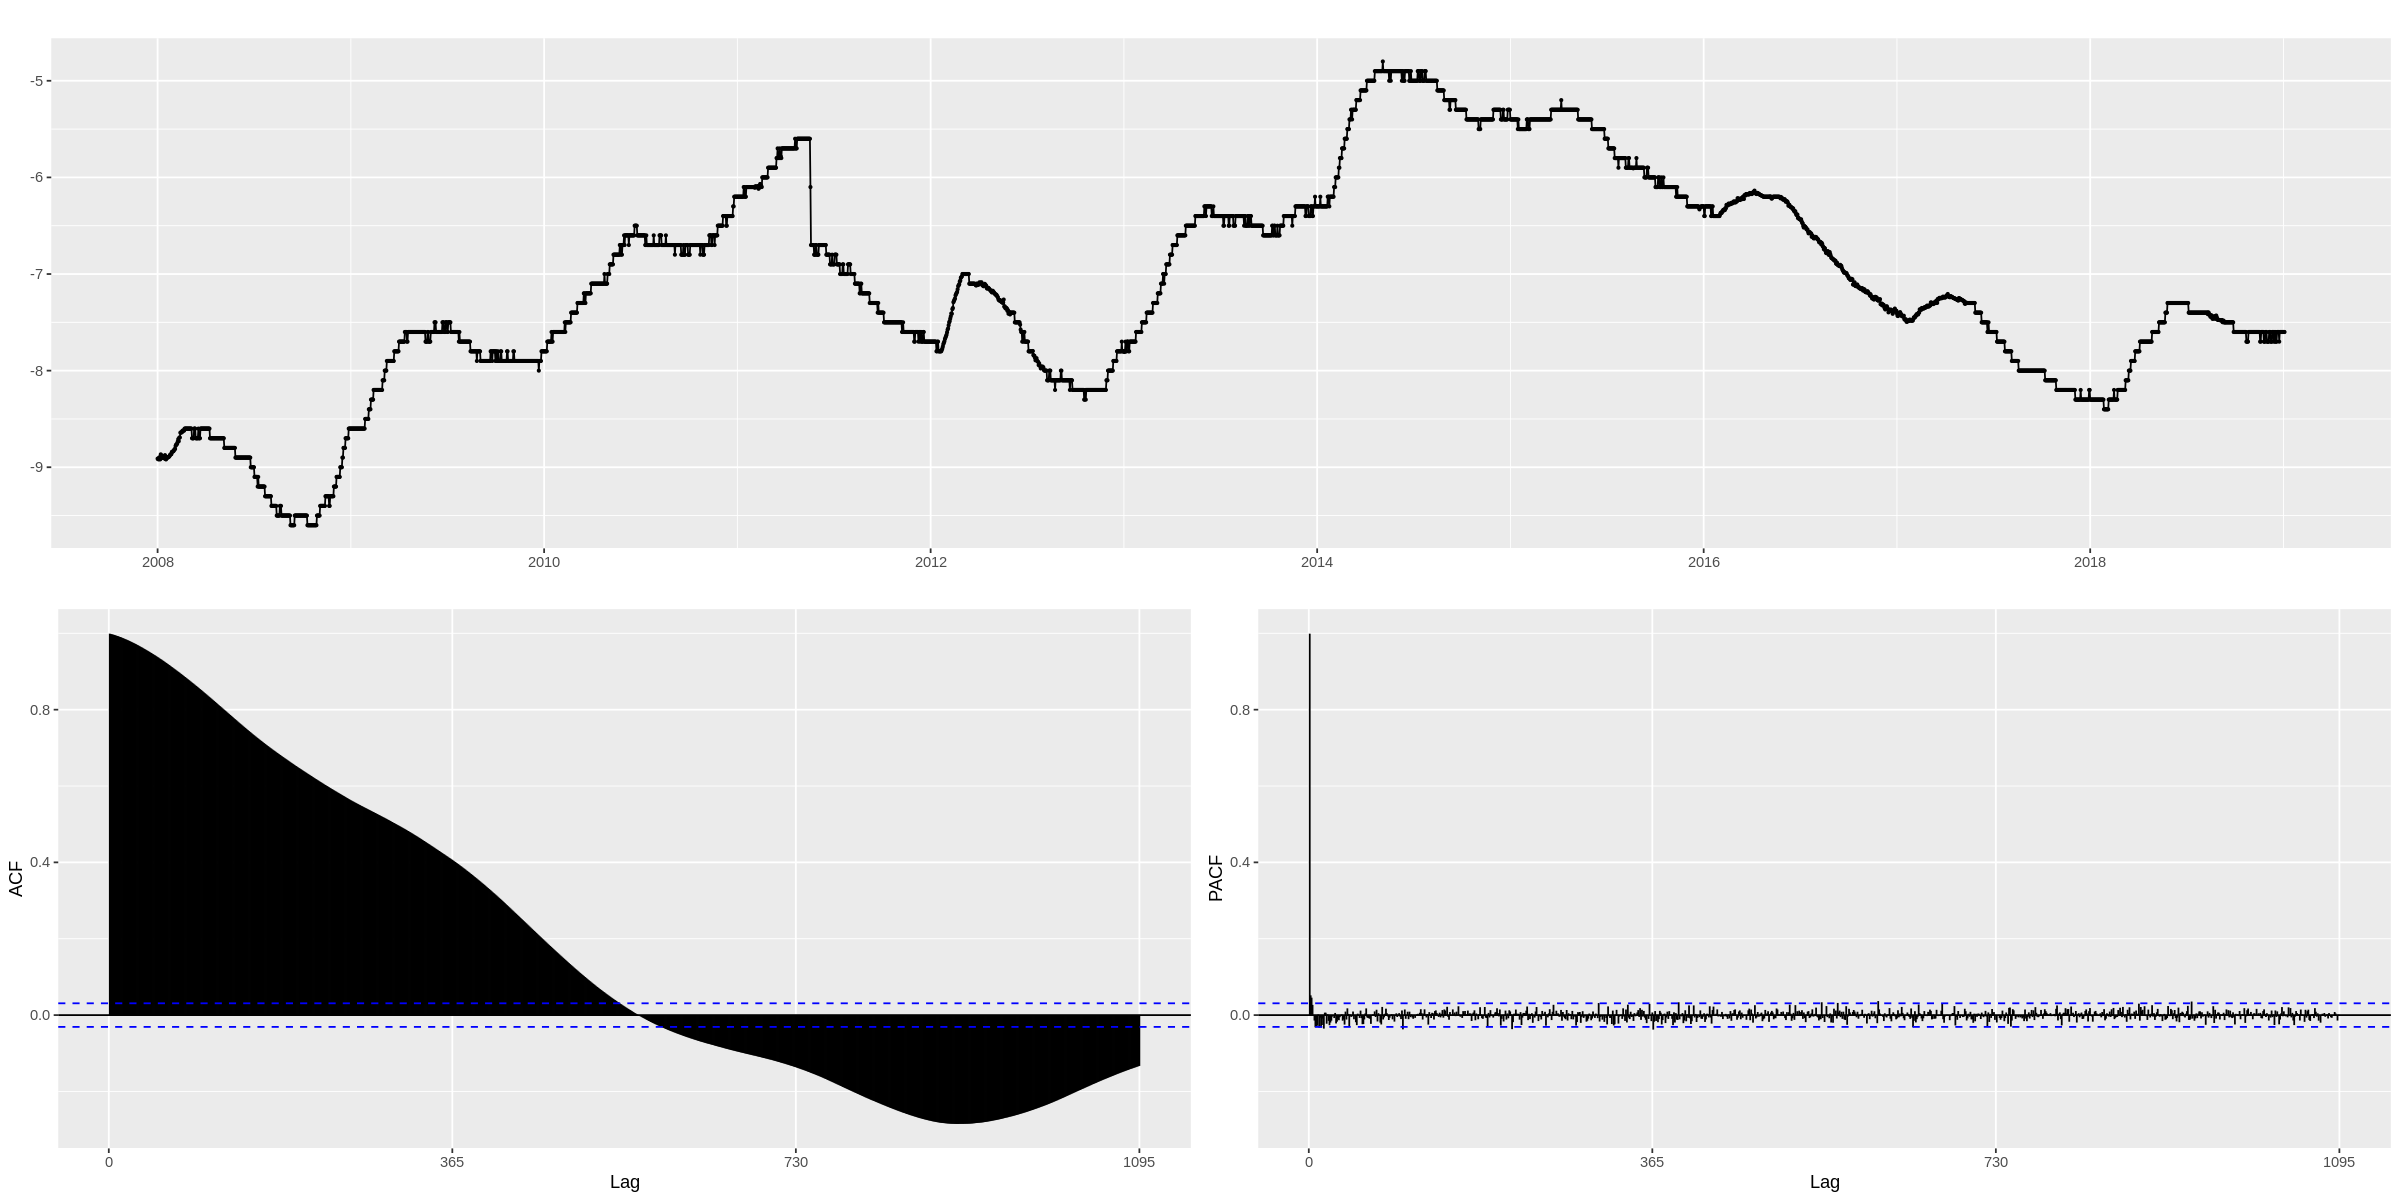

In [134]:
# look at the autocorrelation
ggtsdisplay(luco_output_seadec)  # definitely not a white noise

In [135]:
# look at the amount of differencing needed
ndiffs(luco_output_seadec)  # needs to non-seasonal differencing
nsdiffs(luco_output_seadec)  # needs a seasonal differencing
# together it will be 3 differencing in total and leads to overdifferencing, might need transformation first

[1] 2

[1] 1

function (expr, classes = "warning") 
{
    withCallingHandlers(expr, warning = function(w) if (inherits(w, 
        classes)) 
        tryInvokeRestart("muffleWarning"))
}
<bytecode: 0x55d2e450d168>
<environment: namespace:base>

[1] 1

[1] 1

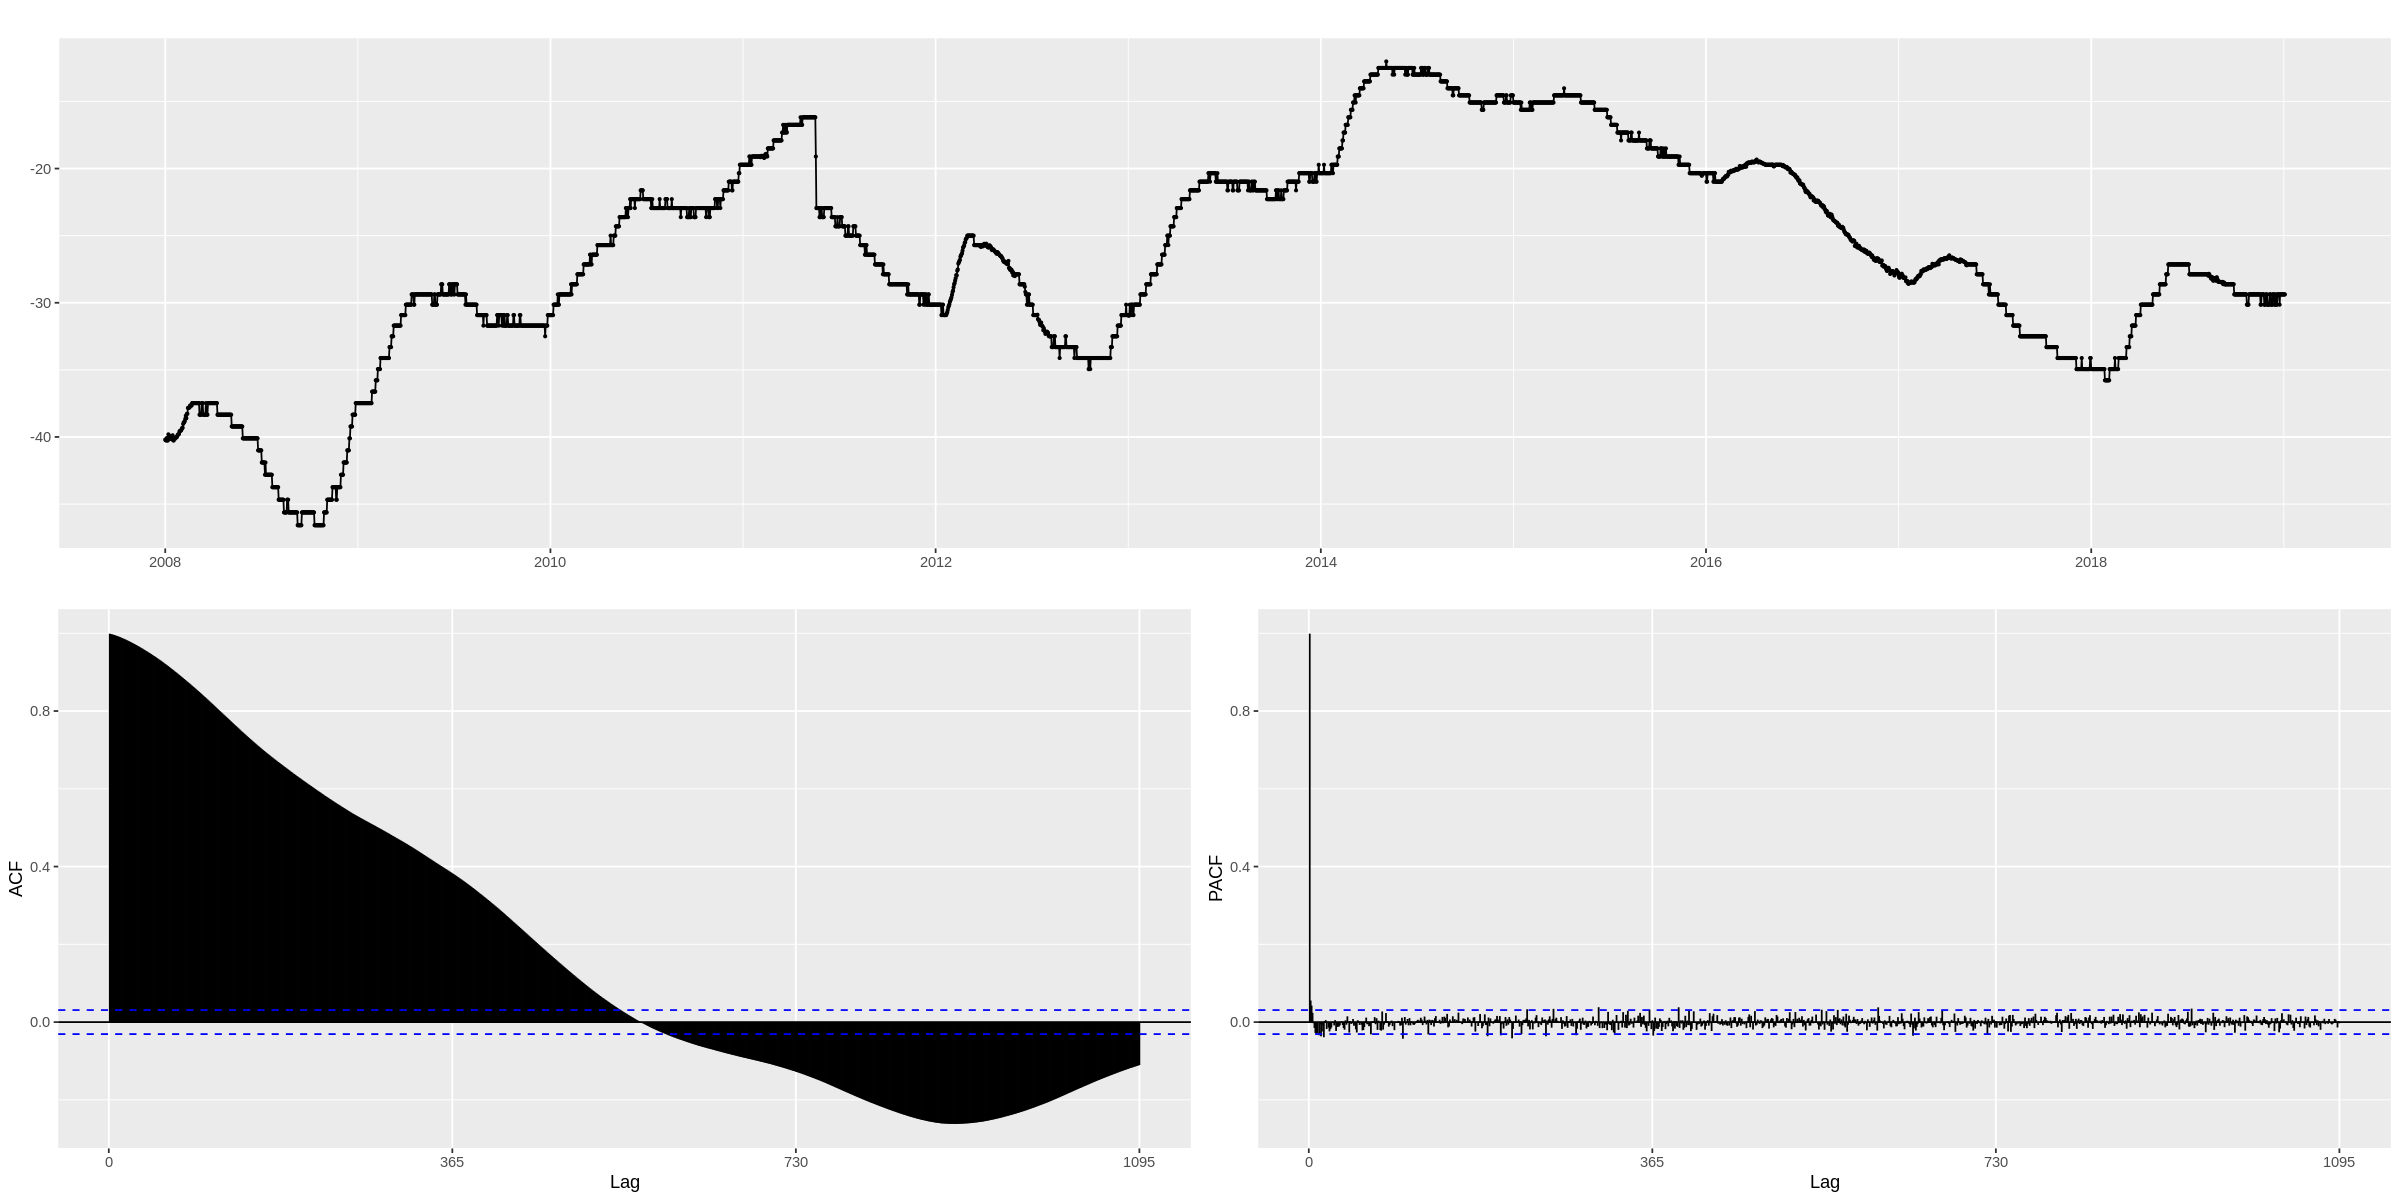

In [136]:
# BoxCox transformation?
suppressWarnings
trans_sea <- suppressWarnings(BoxCox(luco_output_seadec, lambda = BoxCox.lambda(luco_output_seadec)))
nsdiffs(trans_sea)  # need one seasonal diff
ndiffs(diff(trans_sea,12))  # need one non-seasonal diff after seasonal diff
ggtsdisplay(trans_sea)

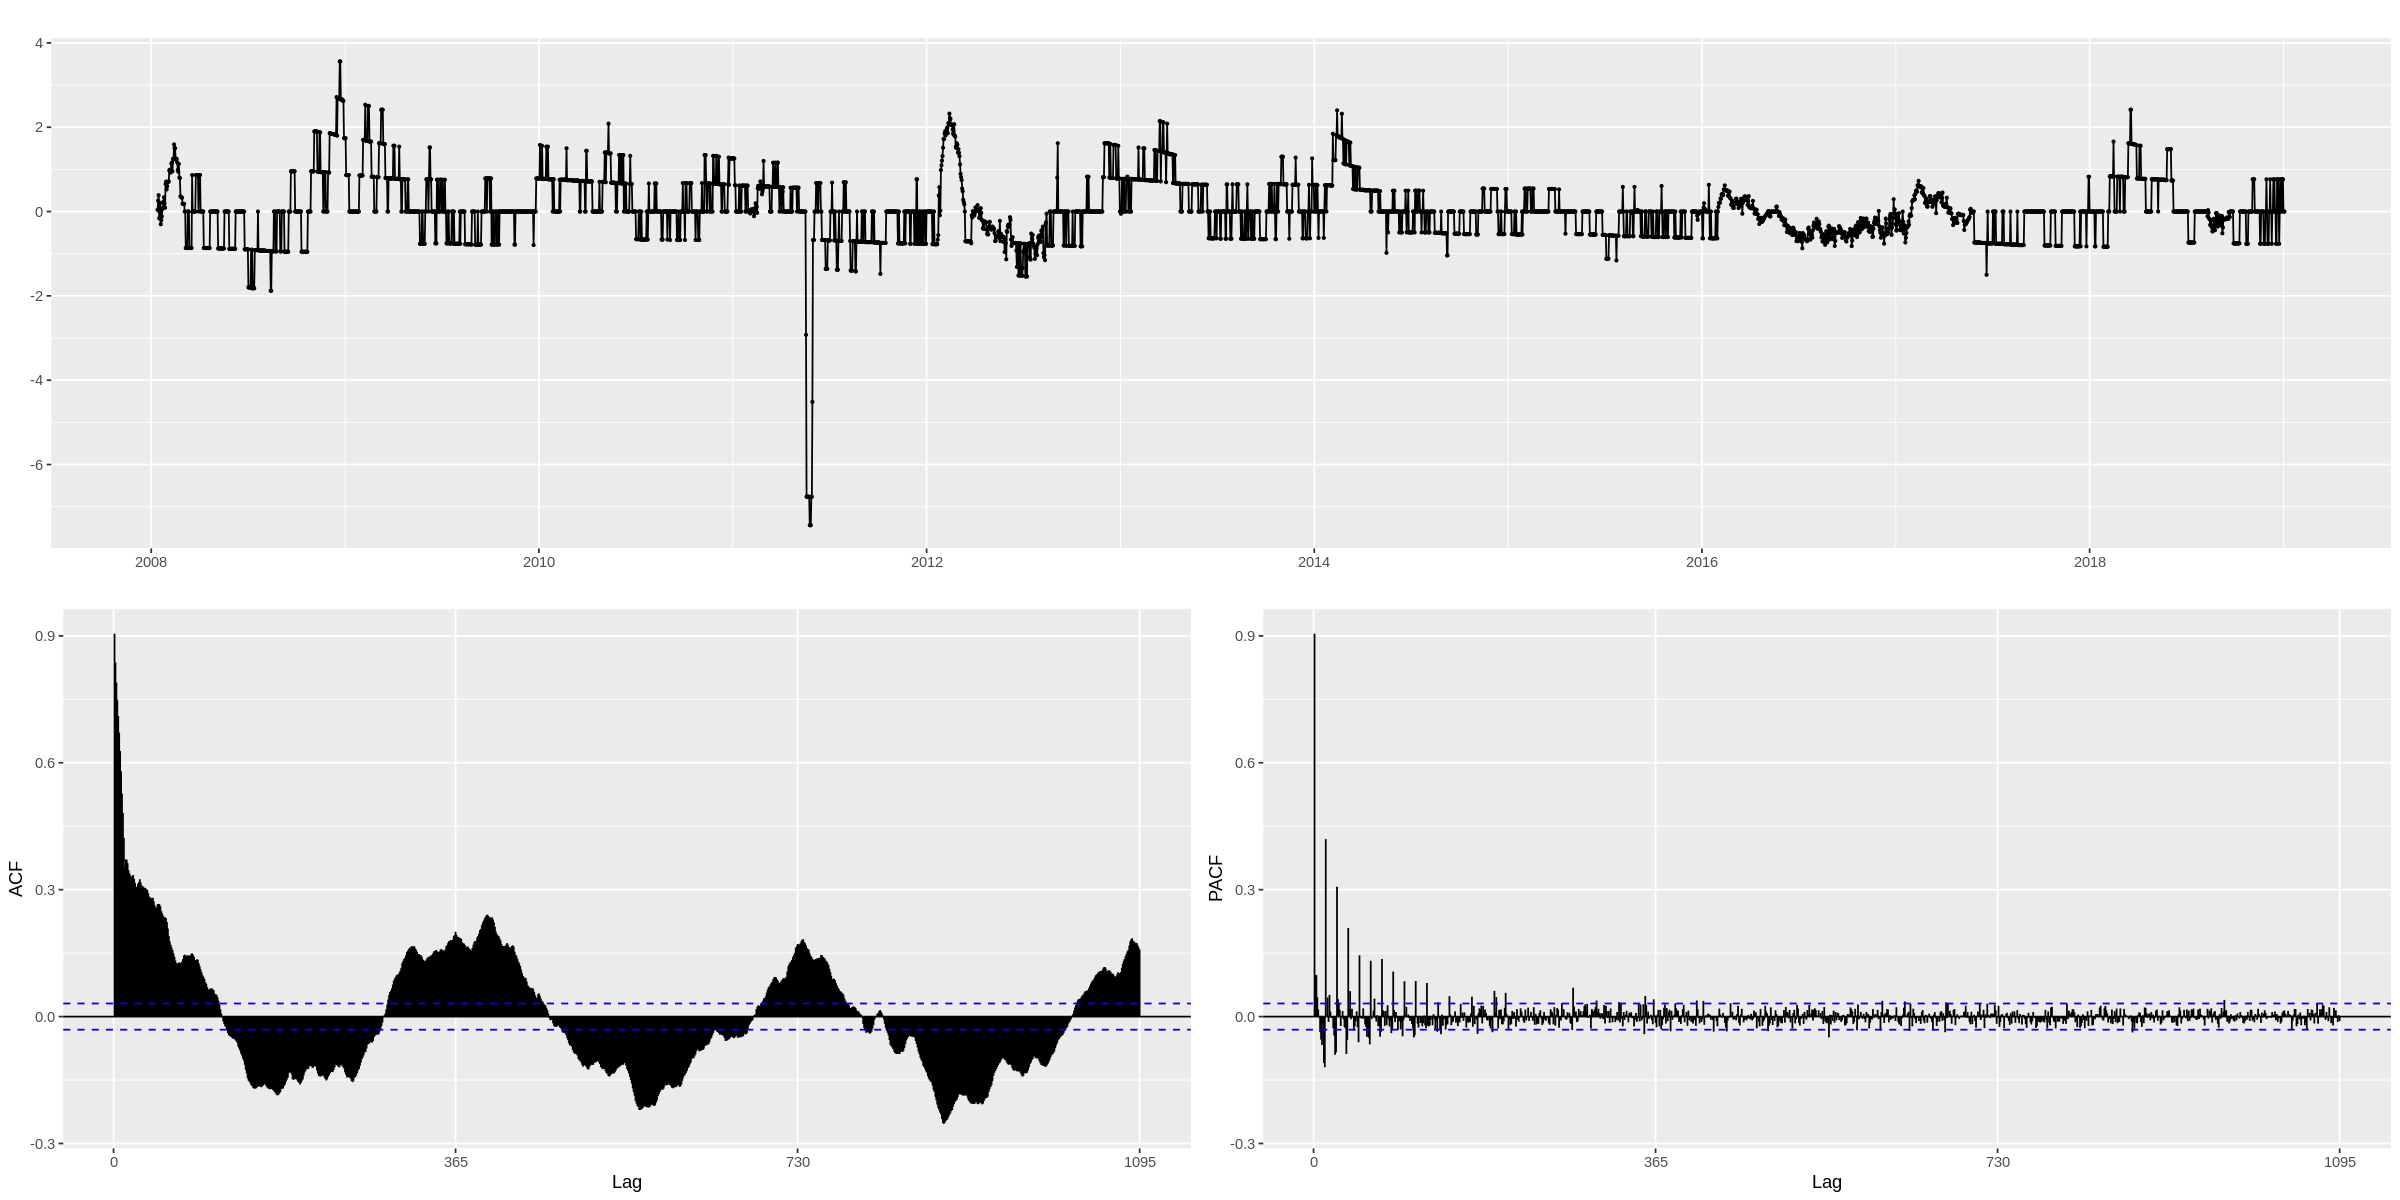

In [137]:
# seasonal differencing of 1
ggtsdisplay(diff(trans_sea, 12))  # looks somewhat better

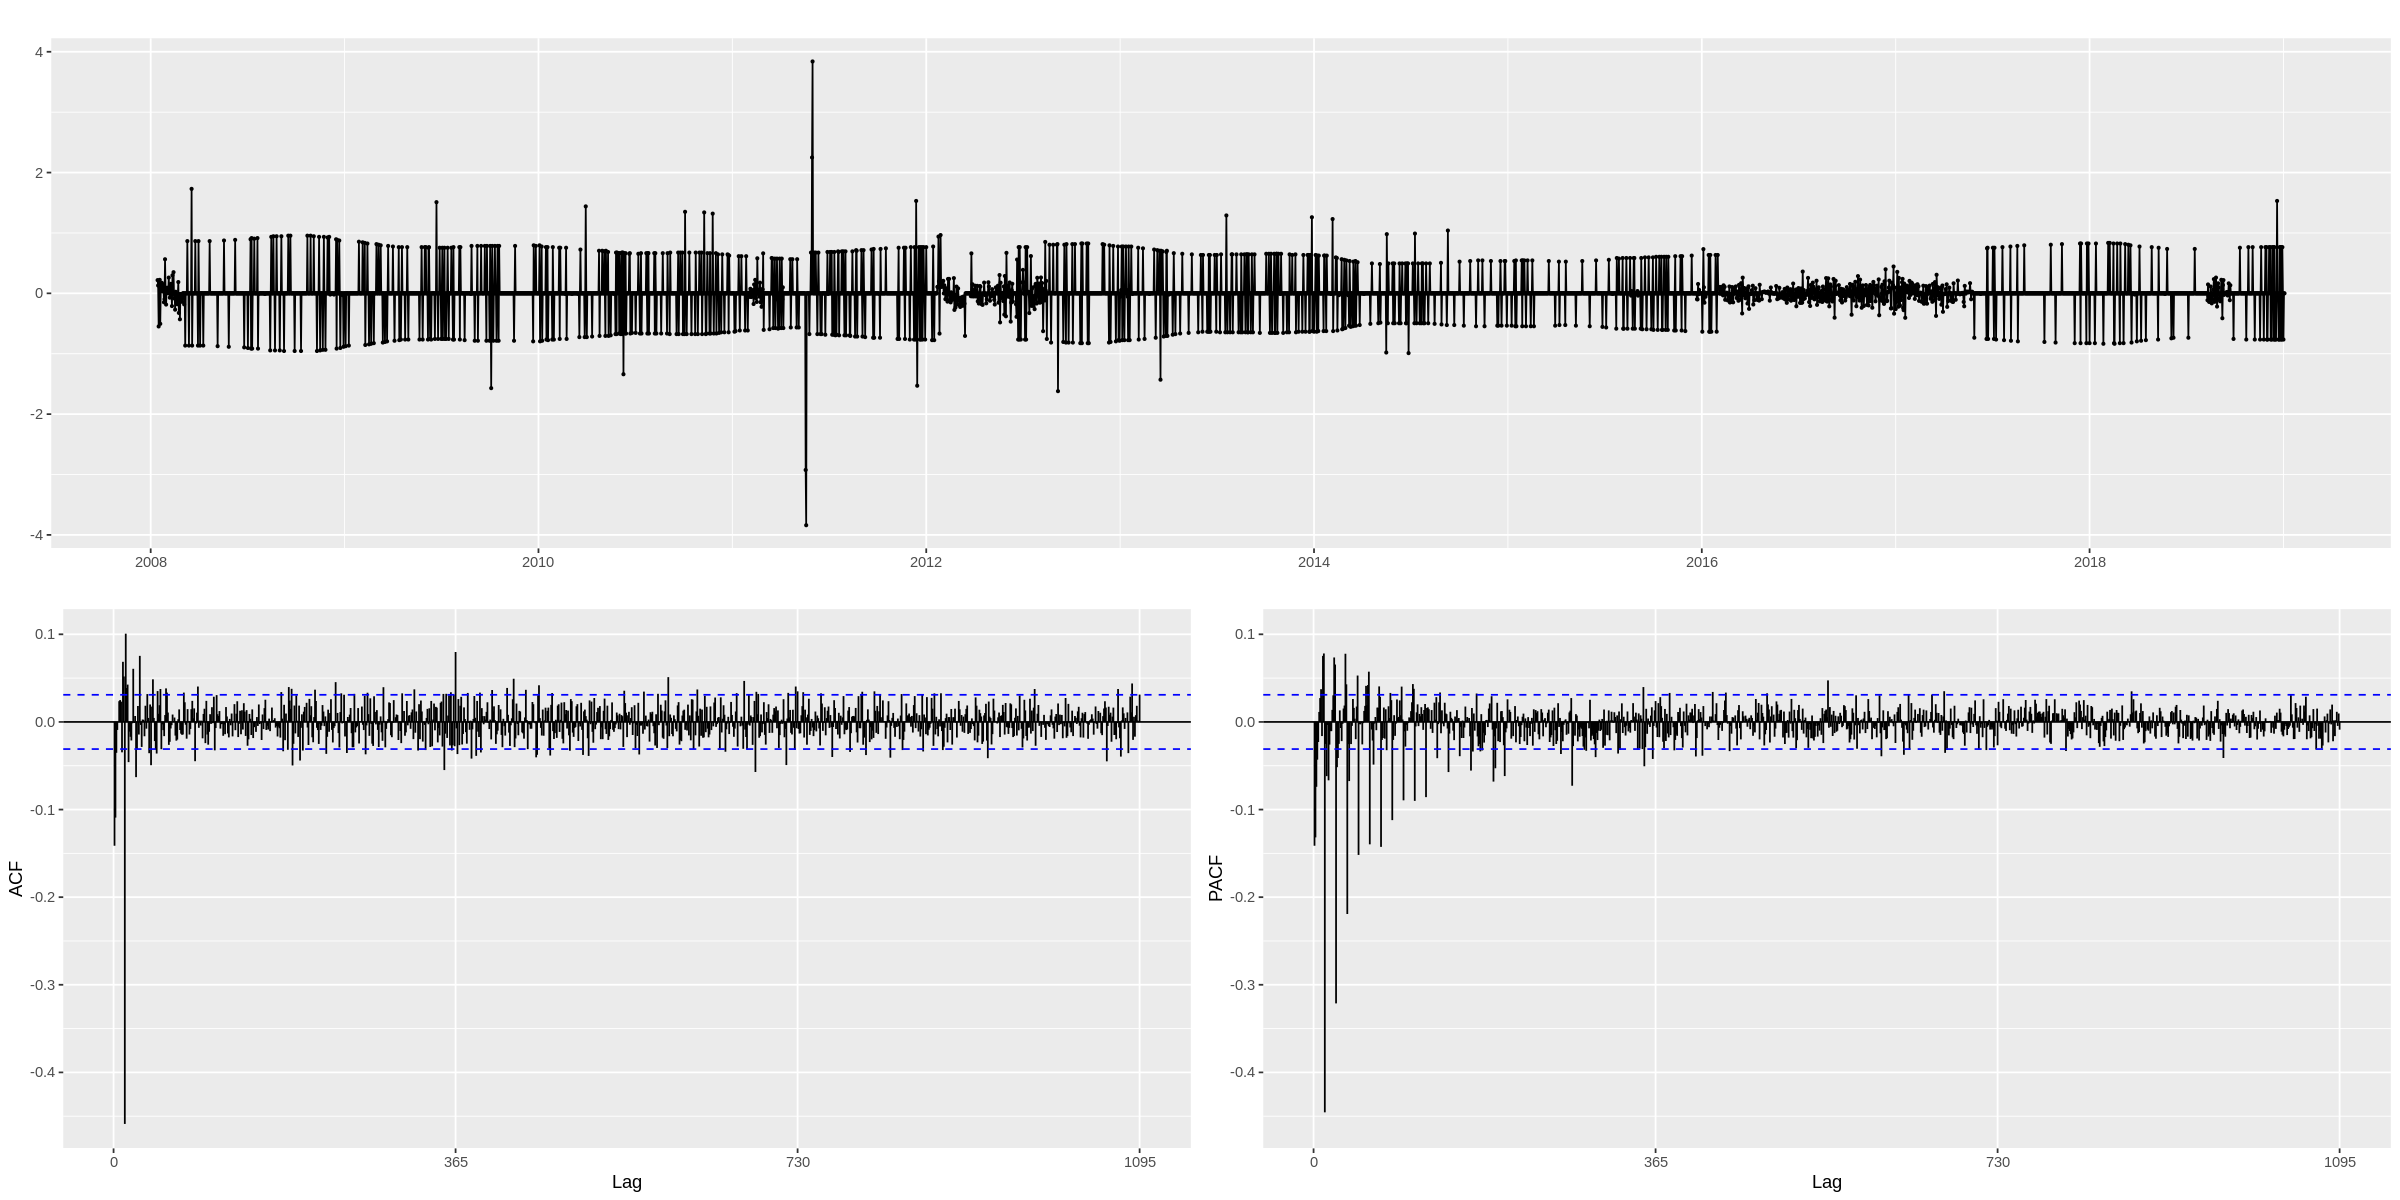

In [138]:
# add in non-seasonal differencing
ggtsdisplay(diff(diff(trans_sea,12)))

In [139]:
# stationarity test
summary(ur.kpss(diff(diff(trans_sea,12))))  # stationary 


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 10 lags. 

Value of test-statistic is: 0.0024 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [140]:
# adf test for stationarity
adf.test(diff(diff(trans_sea,12)))  # stationary


	Augmented Dickey-Fuller Test

data:  diff(diff(trans_sea, 12))
Dickey-Fuller = -23.131, Lag order = 15, p-value = 0.01
alternative hypothesis: stationary


## Fitting Models

In order to find the best fitting model, we'll split the data into training and test data. We'll fit the model using the training data, then we'll check their accuracy using the test data and perform forecasting.

In [141]:
# training: 2008-2016
luco_train <- window(luco_output_seadec, end=2017)
luco_test <- window(luco_output_seadec, start=2017)

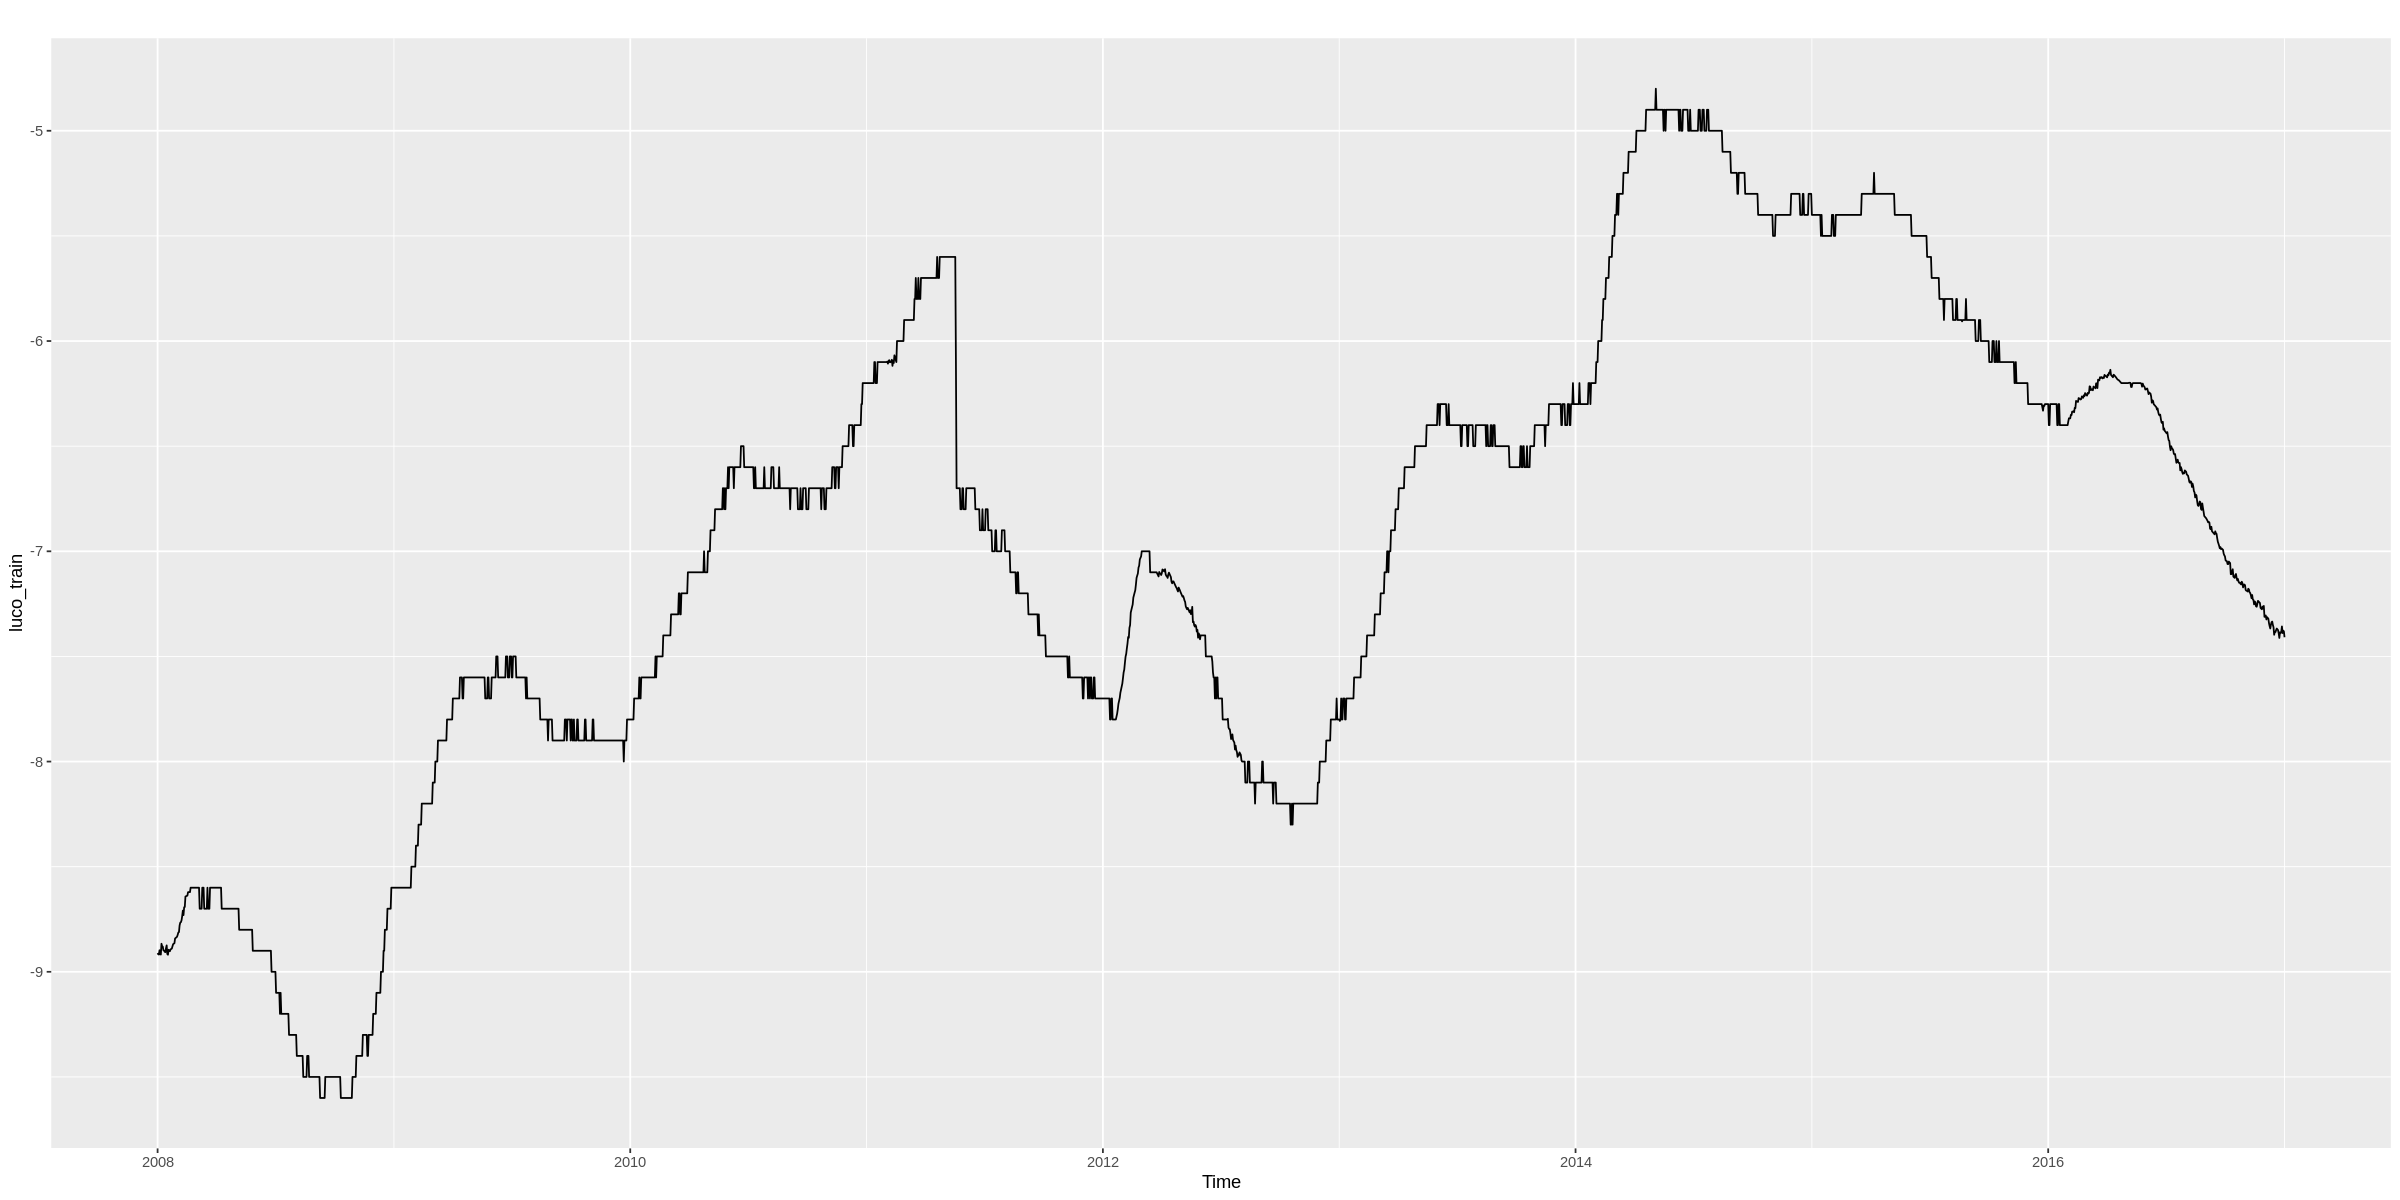

In [142]:
autoplot(luco_train)

### Seasonal Naive

Naive approach sets all forecast to be equal to the value of the last observation. Given that there's a seasonal component, we'll try seasonal naive method, which is given as:

^yT+h|T=yT+h−m(k+1), where m= the seasonal period, and k is the integer part of (h−1)/m (i.e., the number of complete years in the forecast period prior to time T+h). 

Saving 6.67 x 6.67 in image



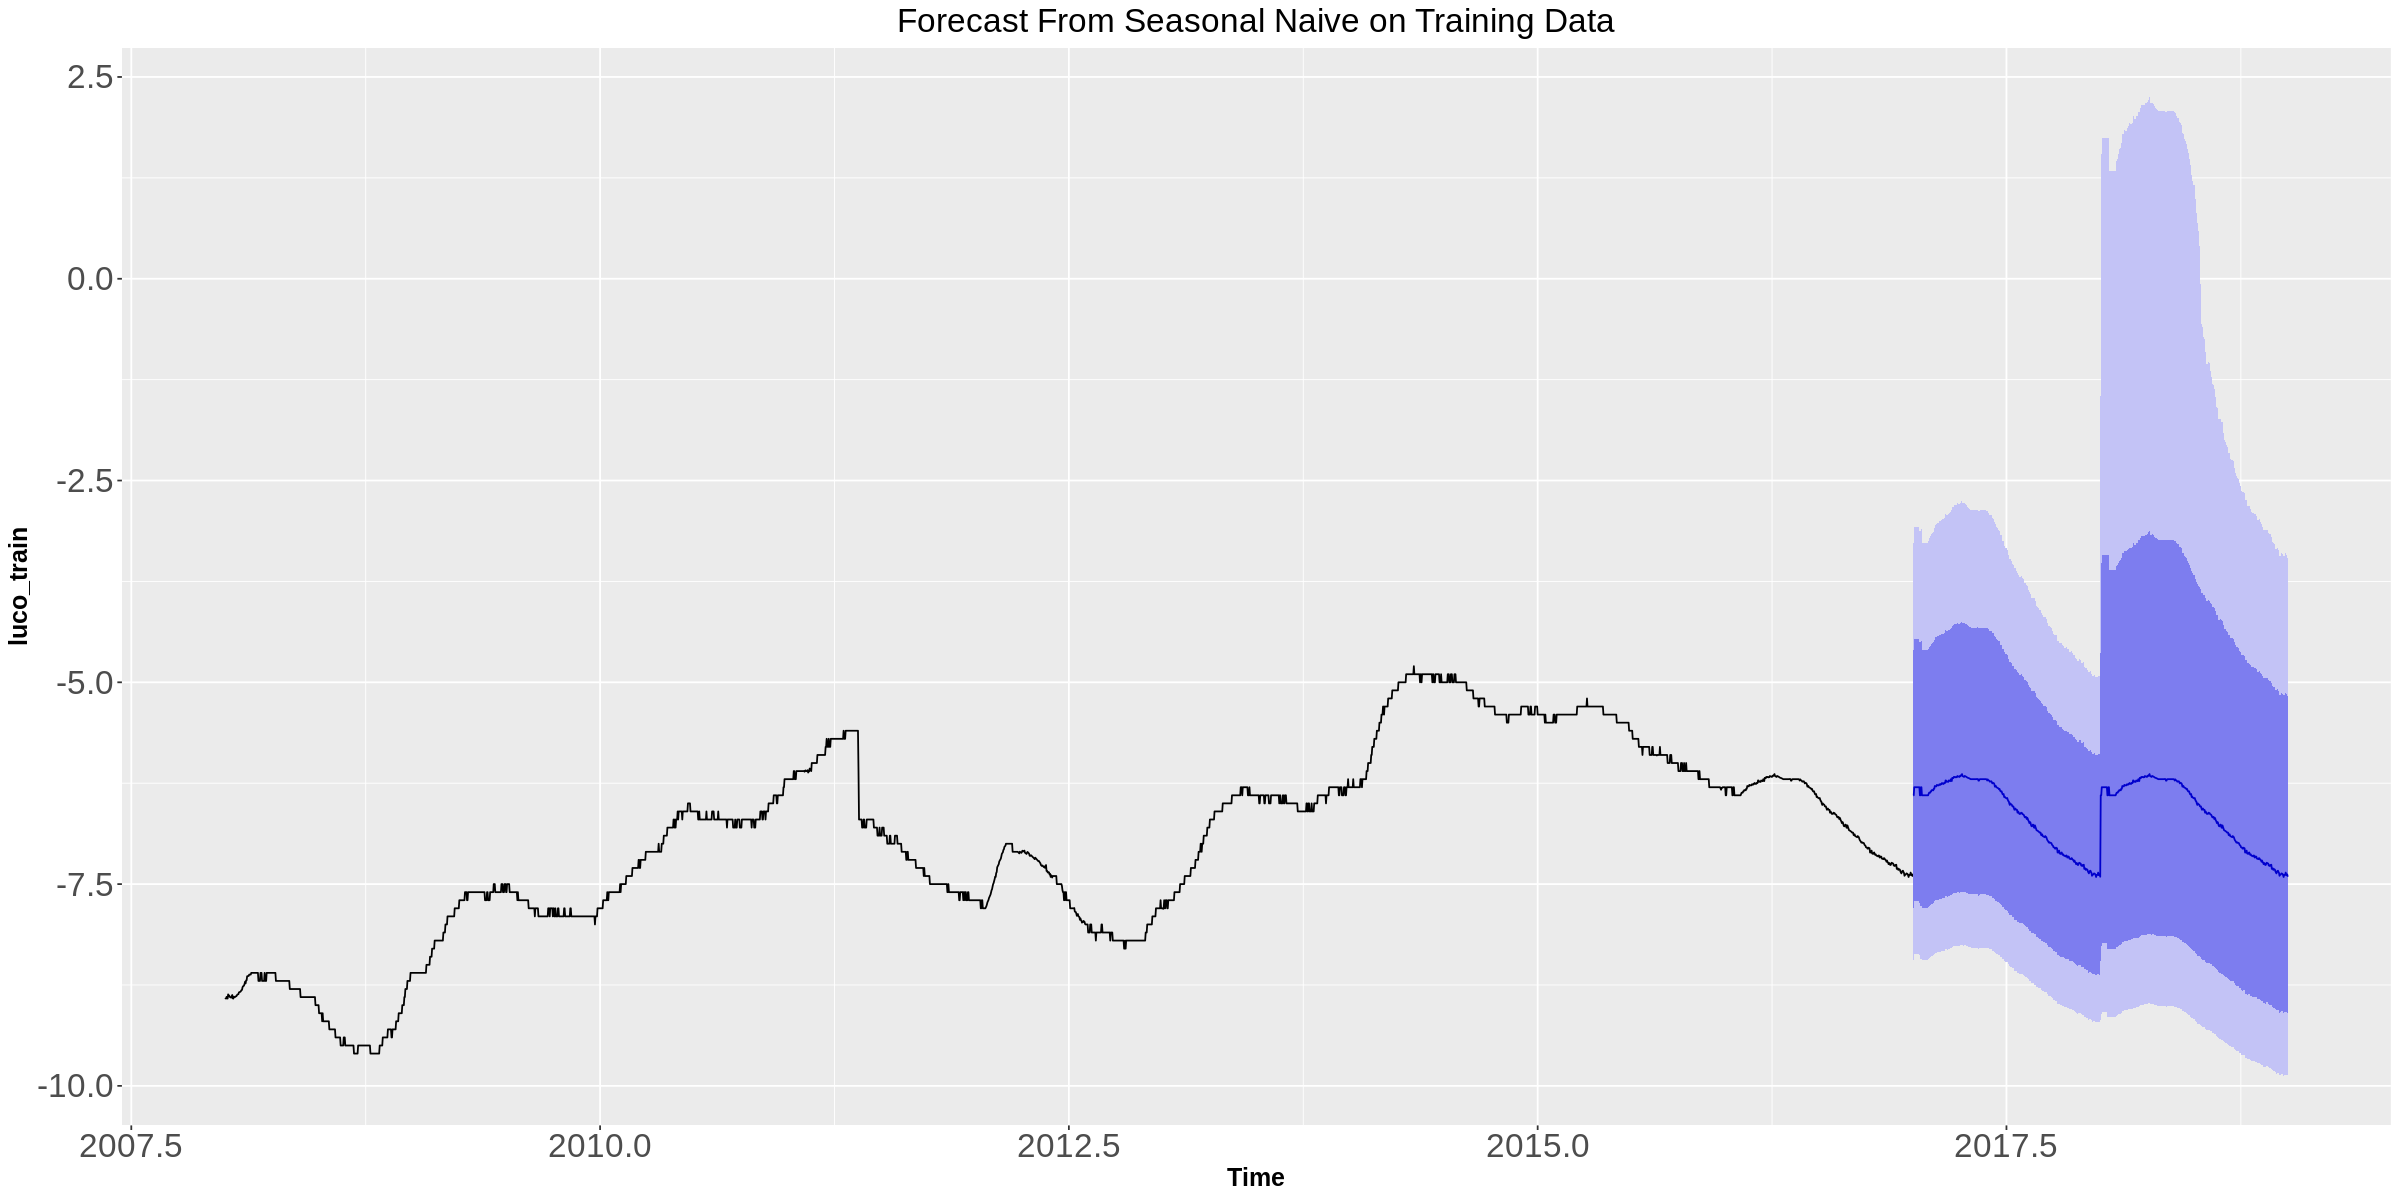

In [143]:
# snaive
options(repr.plot.width=20, repr.plot.height=10)
# warning suppression
oldw <- getOption("warn")
options(warn = -1)

output_snaive <- snaive(luco_train, lambda = BoxCox.lambda(luco_train), h=365*2)

options(warn = oldw)

autoplot(output_snaive) + ggtitle("Forecast From Seasonal Naive on Training Data") +
    theme(axis.text=element_text(size=20),
        axis.title=element_text(size=15,face="bold"),
         plot.title = element_text(hjust = 0.5, size=20))
ggsave("snaive_plot.png", device = "png", path="/home/han/Projects/ACEA_Water/Images/")  # the interval is huge and doesn't look reasonable

### ARIMA

ARIMA aims to explain the autocorrelations in the data, AR corresponds to auto regressive, ie the past data point correlates with future data point while MA corresponds to Moving Average which, in this context, means past prediction error correlates with future prediction.

In [144]:
# use auto arima to find the best model
oldw <- getOption("warn")
options(warn = -1)
output_arima_auto <- auto.arima(luco_train, lambda = BoxCox.lambda(luco_train))
options(warn = oldw)

In [145]:
summary(output_arima_auto)  # Arima(3,1,0)(0,1,0)[365]

Series: luco_train 
ARIMA(3,1,0)(0,1,0)[365] 
Box Cox transformation: lambda= 1.999959 

Coefficients:
          ar1      ar2      ar3
      -0.1331  -0.1299  -0.0560
s.e.   0.0185   0.0185   0.0185

sigma^2 estimated as 0.1224:  log likelihood=-1078.95
AIC=2165.91   AICc=2165.92   BIC=2189.83

Training set error measures:
                       ME      RMSE        MAE        MPE      MAPE       MASE
Training set -0.001024874 0.0494377 0.02500607 0.01967555 0.3835277 0.02487701
                     ACF1
Training set -0.006490525


In [146]:
# fit arima
oldw <- getOption("warn")
options(warn = -1)
output_arima310010 <- forecast::Arima(luco_train, lambda = BoxCox.lambda(luco_train), order=c(3,1,0), seasonal=c(0,1,0))
options(warn = oldw)

Saving 6.67 x 6.67 in image



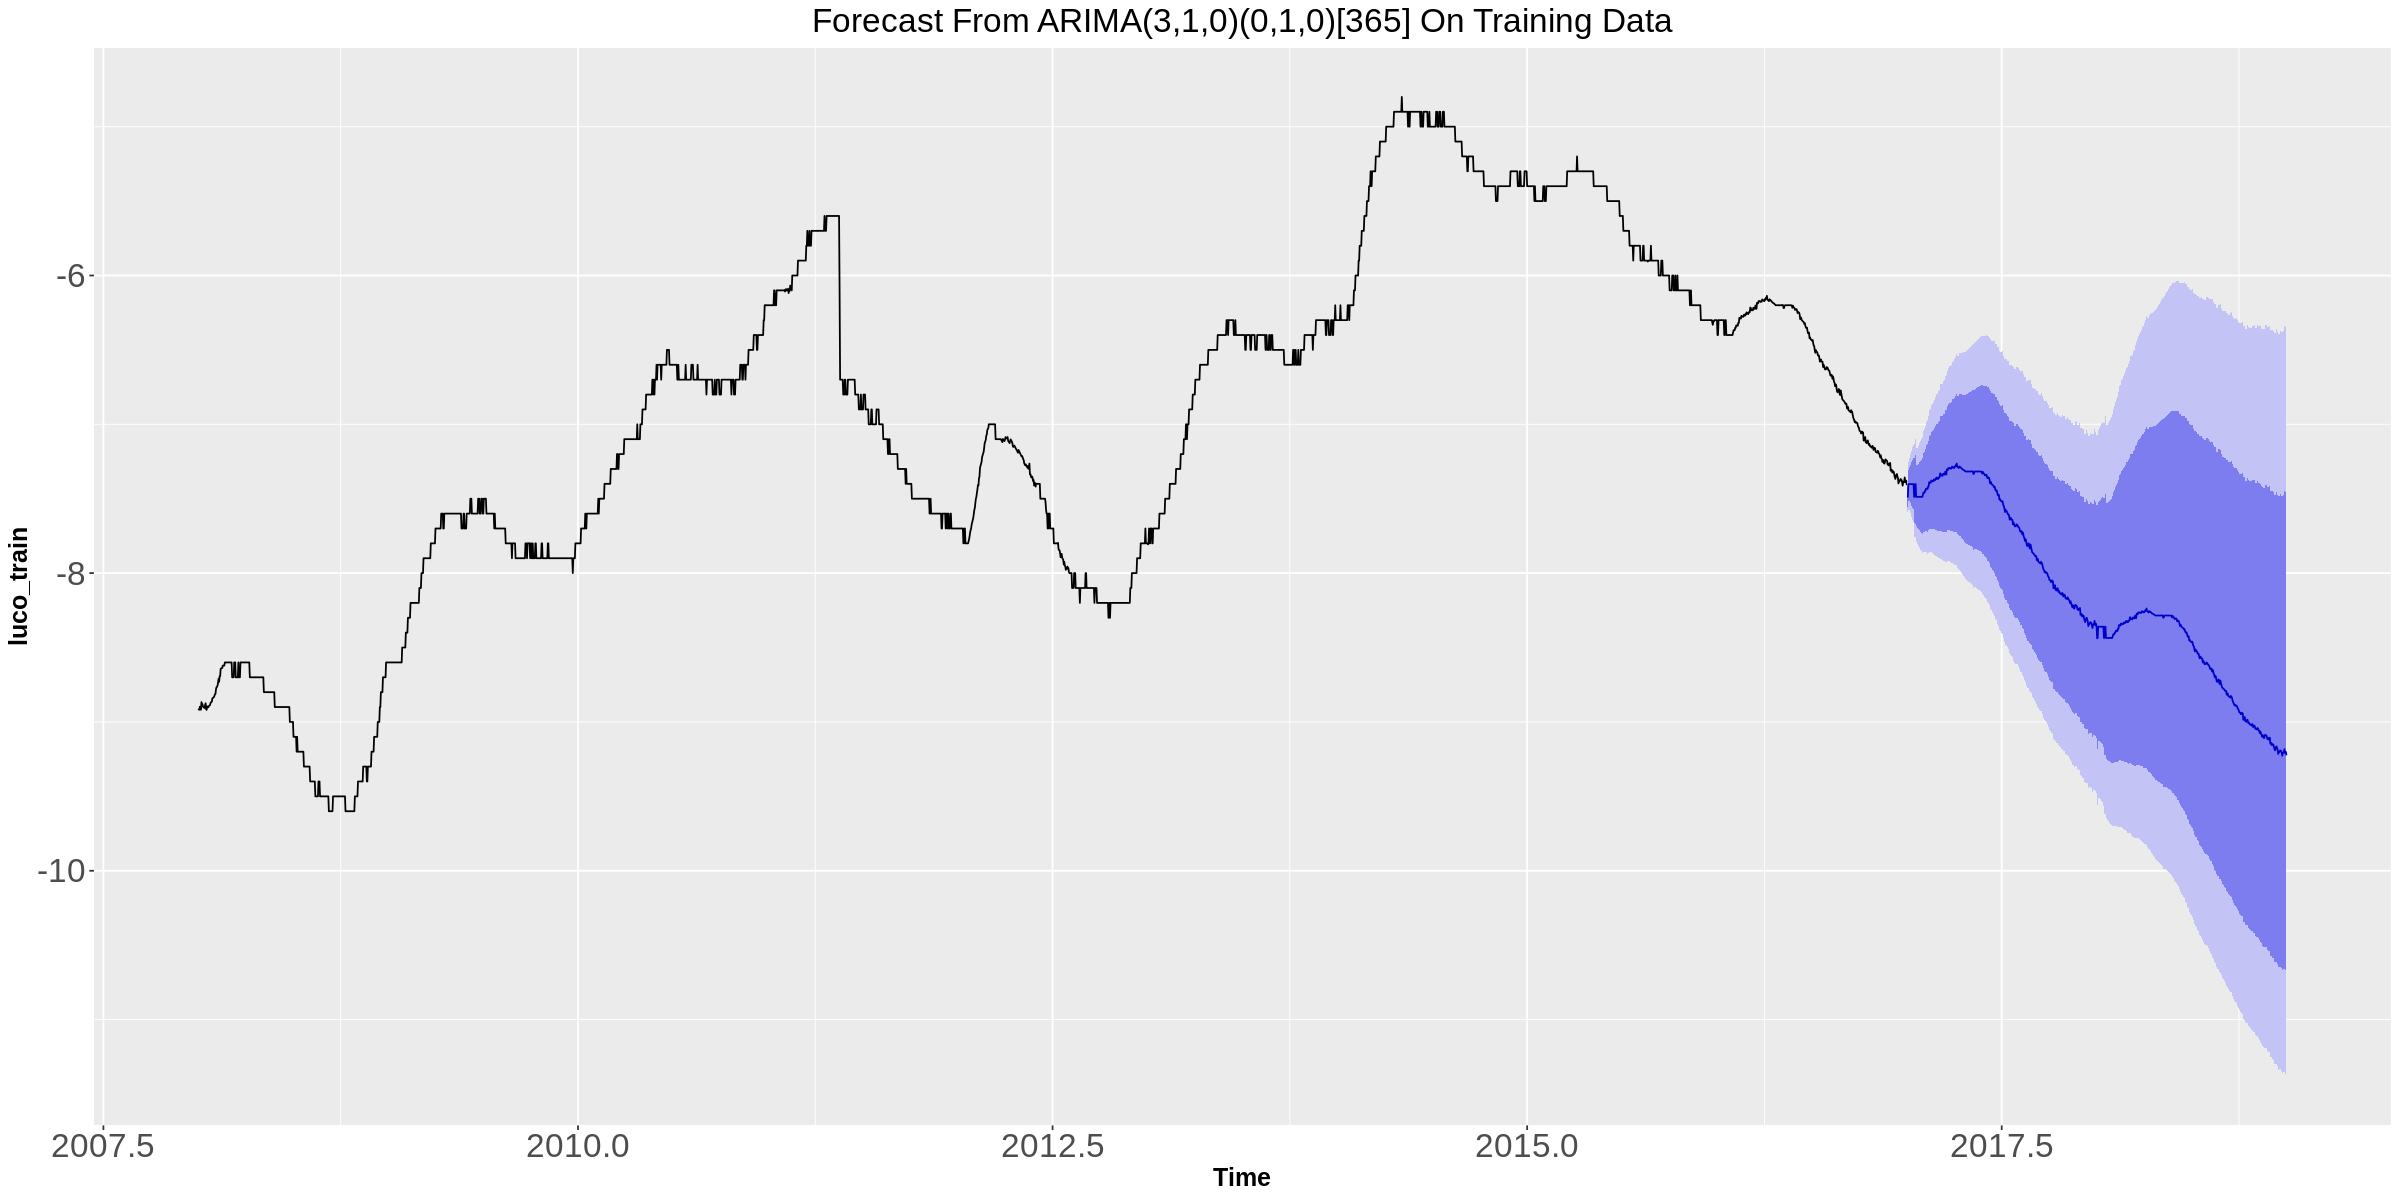

In [147]:
# plot
autoplot(forecast(output_arima310010, h=365*2)) + ggtitle("Forecast From ARIMA(3,1,0)(0,1,0)[365] On Training Data") +
                                        theme(axis.text=element_text(size=20),
                                        axis.title=element_text(size=15,face="bold"),
                                        plot.title = element_text(hjust = 0.5, size=20))
ggsave("arima310010_plot.png", device = "png", path="/home/han/Projects/ACEA_Water/Images/")
# it looks pretty reasonable but the predictions get larger over time


	Ljung-Box test

data:  Residuals from ARIMA(3,1,0)(0,1,0)[365]
Q* = 2039.4, df = 654, p-value < 2.2e-16

Model df: 3.   Total lags used: 657



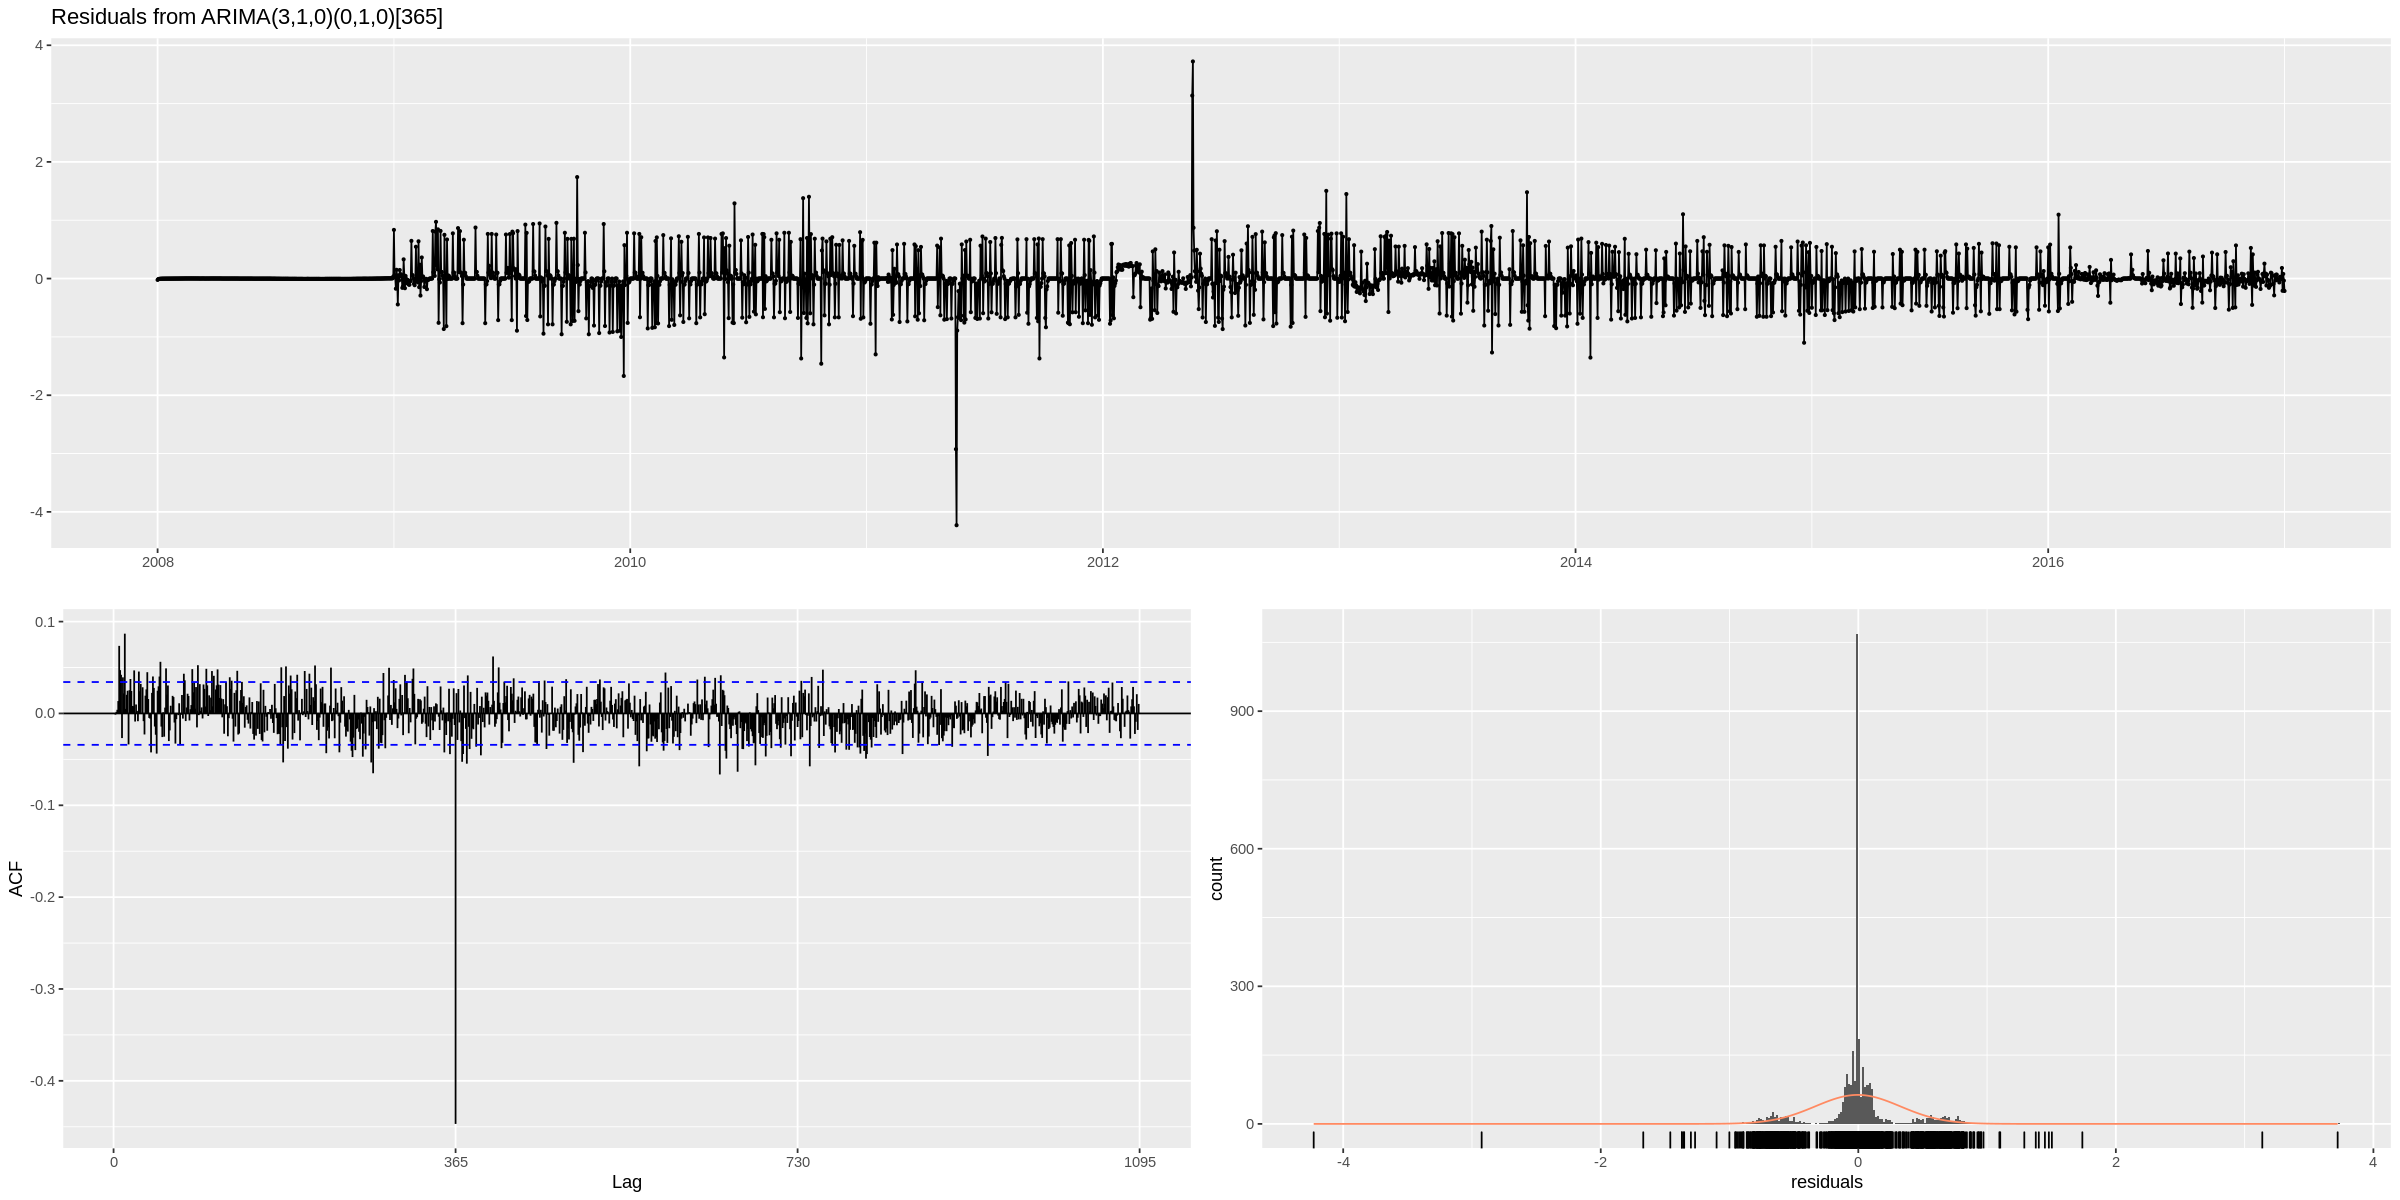

In [148]:
# diagnostics
checkresiduals(output_arima310010)  # definitely not the best

### Exponential smoothing

Forecasts produced using exponential smoothing methods are weighted averages of past observations, with the weights decaying exponentially as the observations get older. In other words, the more recent the observation the higher the associated weight.

In [149]:
# model selection
# ets without damped with boxcox
oldw <- getOption("warn")
options(warn = -1)
output_ets_boxcox_fit <- ets(luco_train, lambda = BoxCox.lambda(luco_train))
output_ets_damped_boxcox_fit <- ets(luco_train, lambda = BoxCox.lambda(luco_train), damped = TRUE)
options(warn = oldw)

In [150]:
# report
summary(output_ets_boxcox_fit)

ETS(A,Ad,N) 

Call:
 ets(y = luco_train, lambda = BoxCox.lambda(luco_train)) 

  Box-Cox transformation: lambda= 2 

  Smoothing parameters:
    alpha = 0.8326 
    beta  = 0.0172 
    phi   = 0.98 

  Initial states:
    l = -40.5075 
    b = 0.0146 

  sigma:  0.2527

     AIC     AICc      BIC 
17575.99 17576.01 17612.57 

Training set error measures:
                       ME       RMSE        MAE          MPE      MAPE
Training set 0.0001723103 0.03665888 0.01624537 -0.002305405 0.2401138
                   MASE       ACF1
Training set 0.01616153 0.03829026


In [151]:
# with damped
summary(output_ets_damped_boxcox_fit)

ETS(A,Ad,N) 

Call:
 ets(y = luco_train, damped = TRUE, lambda = BoxCox.lambda(luco_train)) 

  Box-Cox transformation: lambda= 2 

  Smoothing parameters:
    alpha = 0.8326 
    beta  = 0.0172 
    phi   = 0.98 

  Initial states:
    l = -40.5075 
    b = 0.0146 

  sigma:  0.2527

     AIC     AICc      BIC 
17575.99 17576.01 17612.57 

Training set error measures:
                       ME       RMSE        MAE          MPE      MAPE
Training set 0.0001723103 0.03665888 0.01624537 -0.002305405 0.2401138
                   MASE       ACF1
Training set 0.01616153 0.03829026


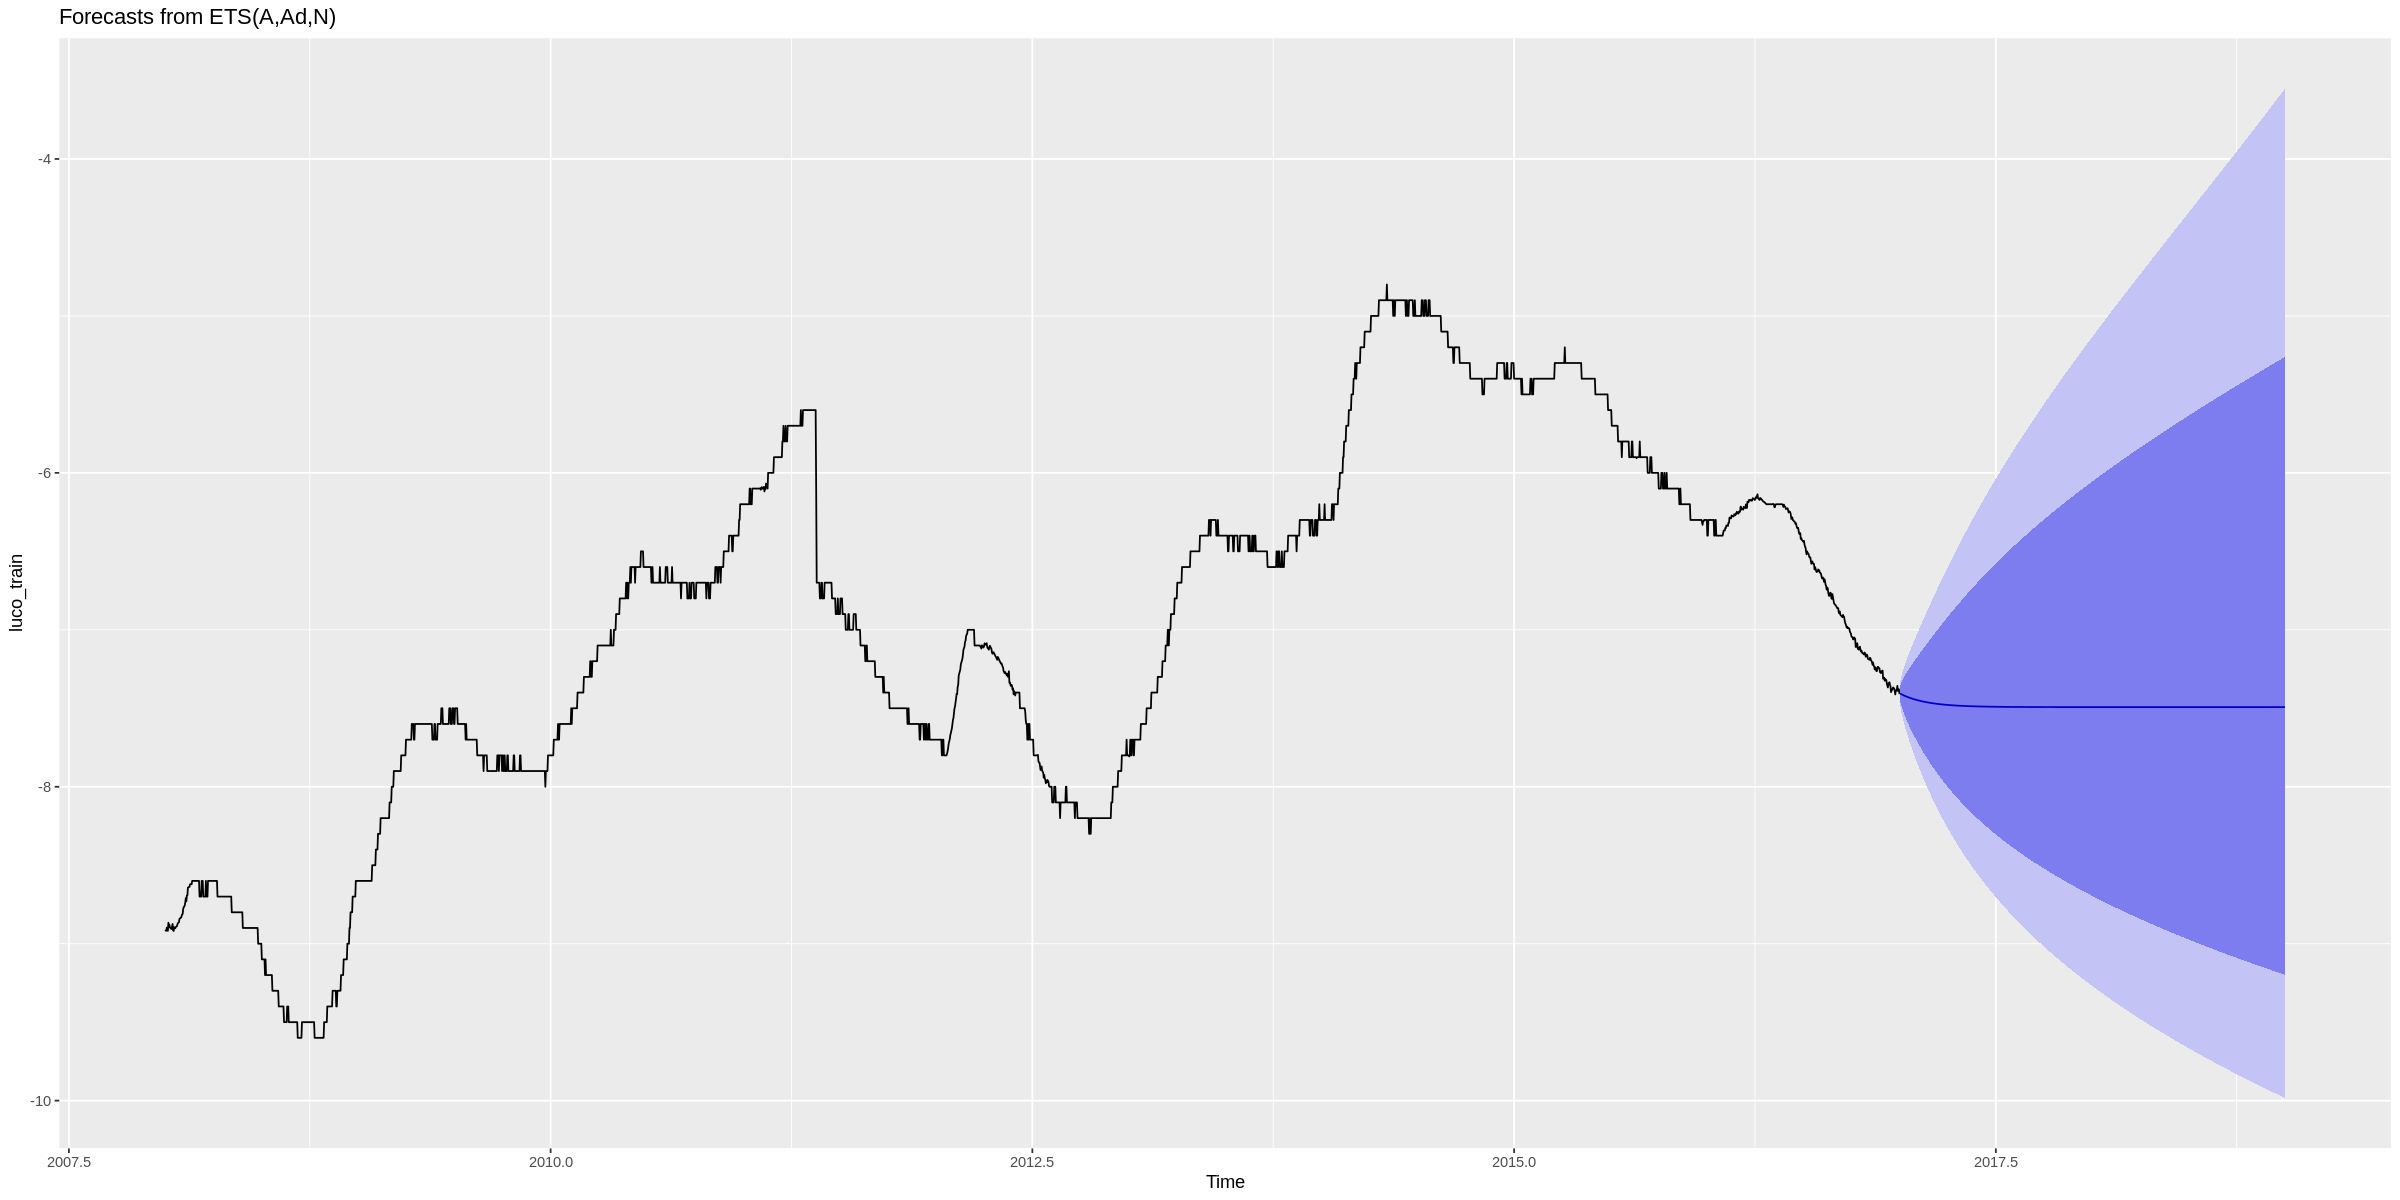

In [152]:
# forecast
autoplot(forecast(output_ets_boxcox_fit, h=365*2))  # not very reasonable forecast, reverts to mean

### Seasonal decompose and forecast

STL is an acronym for “Seasonal and Trend decomposition using Loess,” while Loess is a method for estimating nonlinear relationships. 

In [154]:
# fitting stl and forecast via arima
oldw <- getOption("warn")
options(warn = -1)
output_stlf_arima <- luco_train %>% stlf(method="arima", lambda = BoxCox.lambda(luco_train), s.window = 366, h=365*2)
output_stlf_ets <- luco_train %>% stlf(etsmodel="AAA", s.window = 366, h=365*2)
options(warn = oldw)

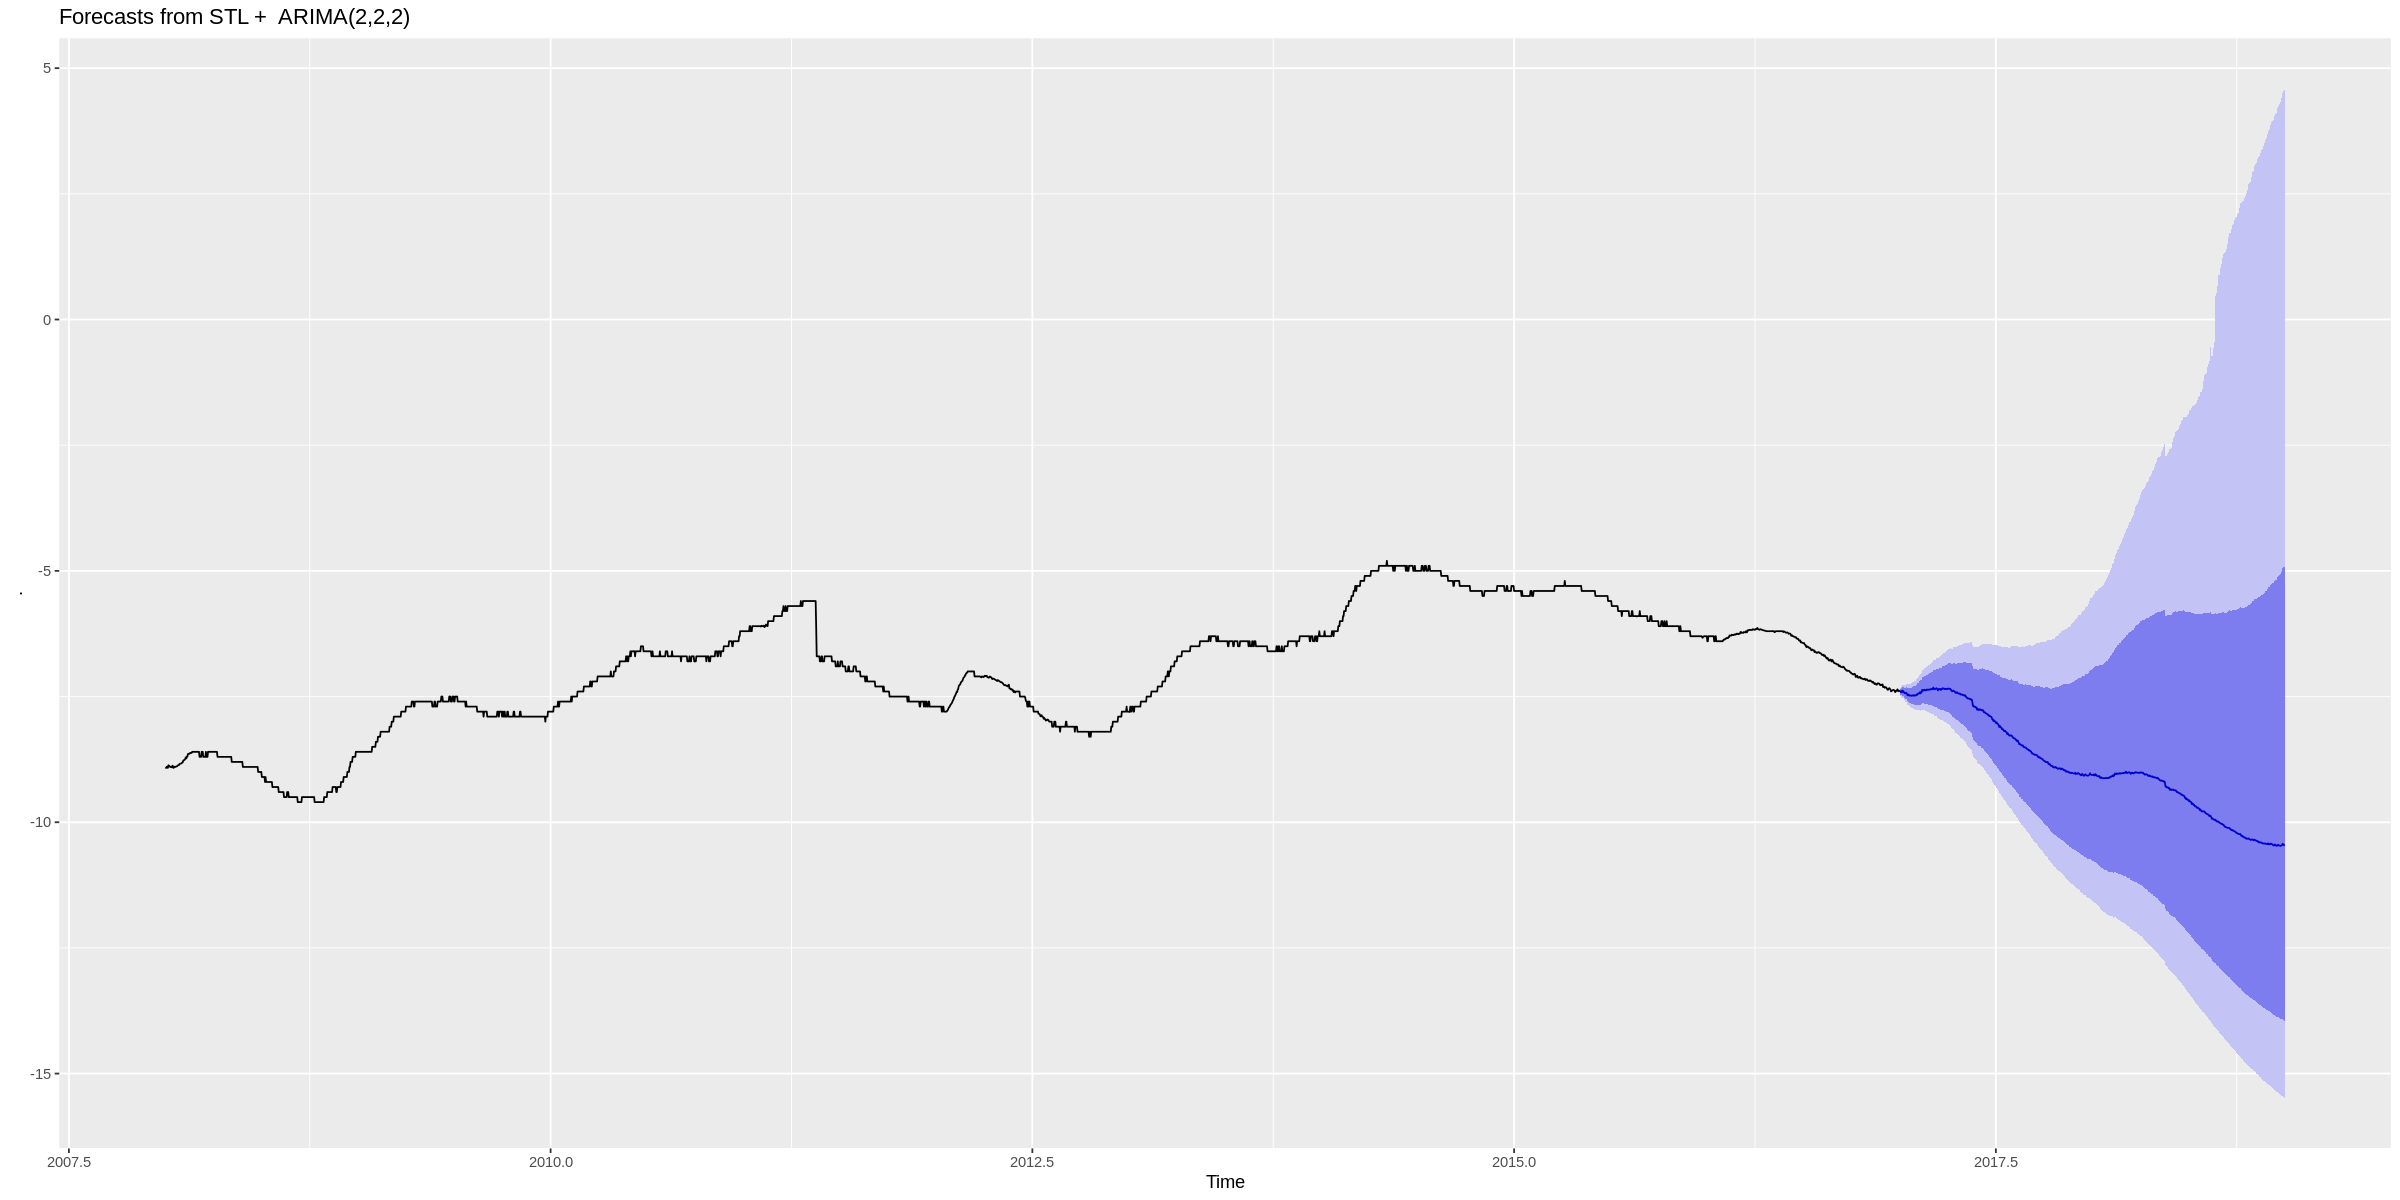

In [155]:
# plot stlf and arima
autoplot(output_stlf_arima)

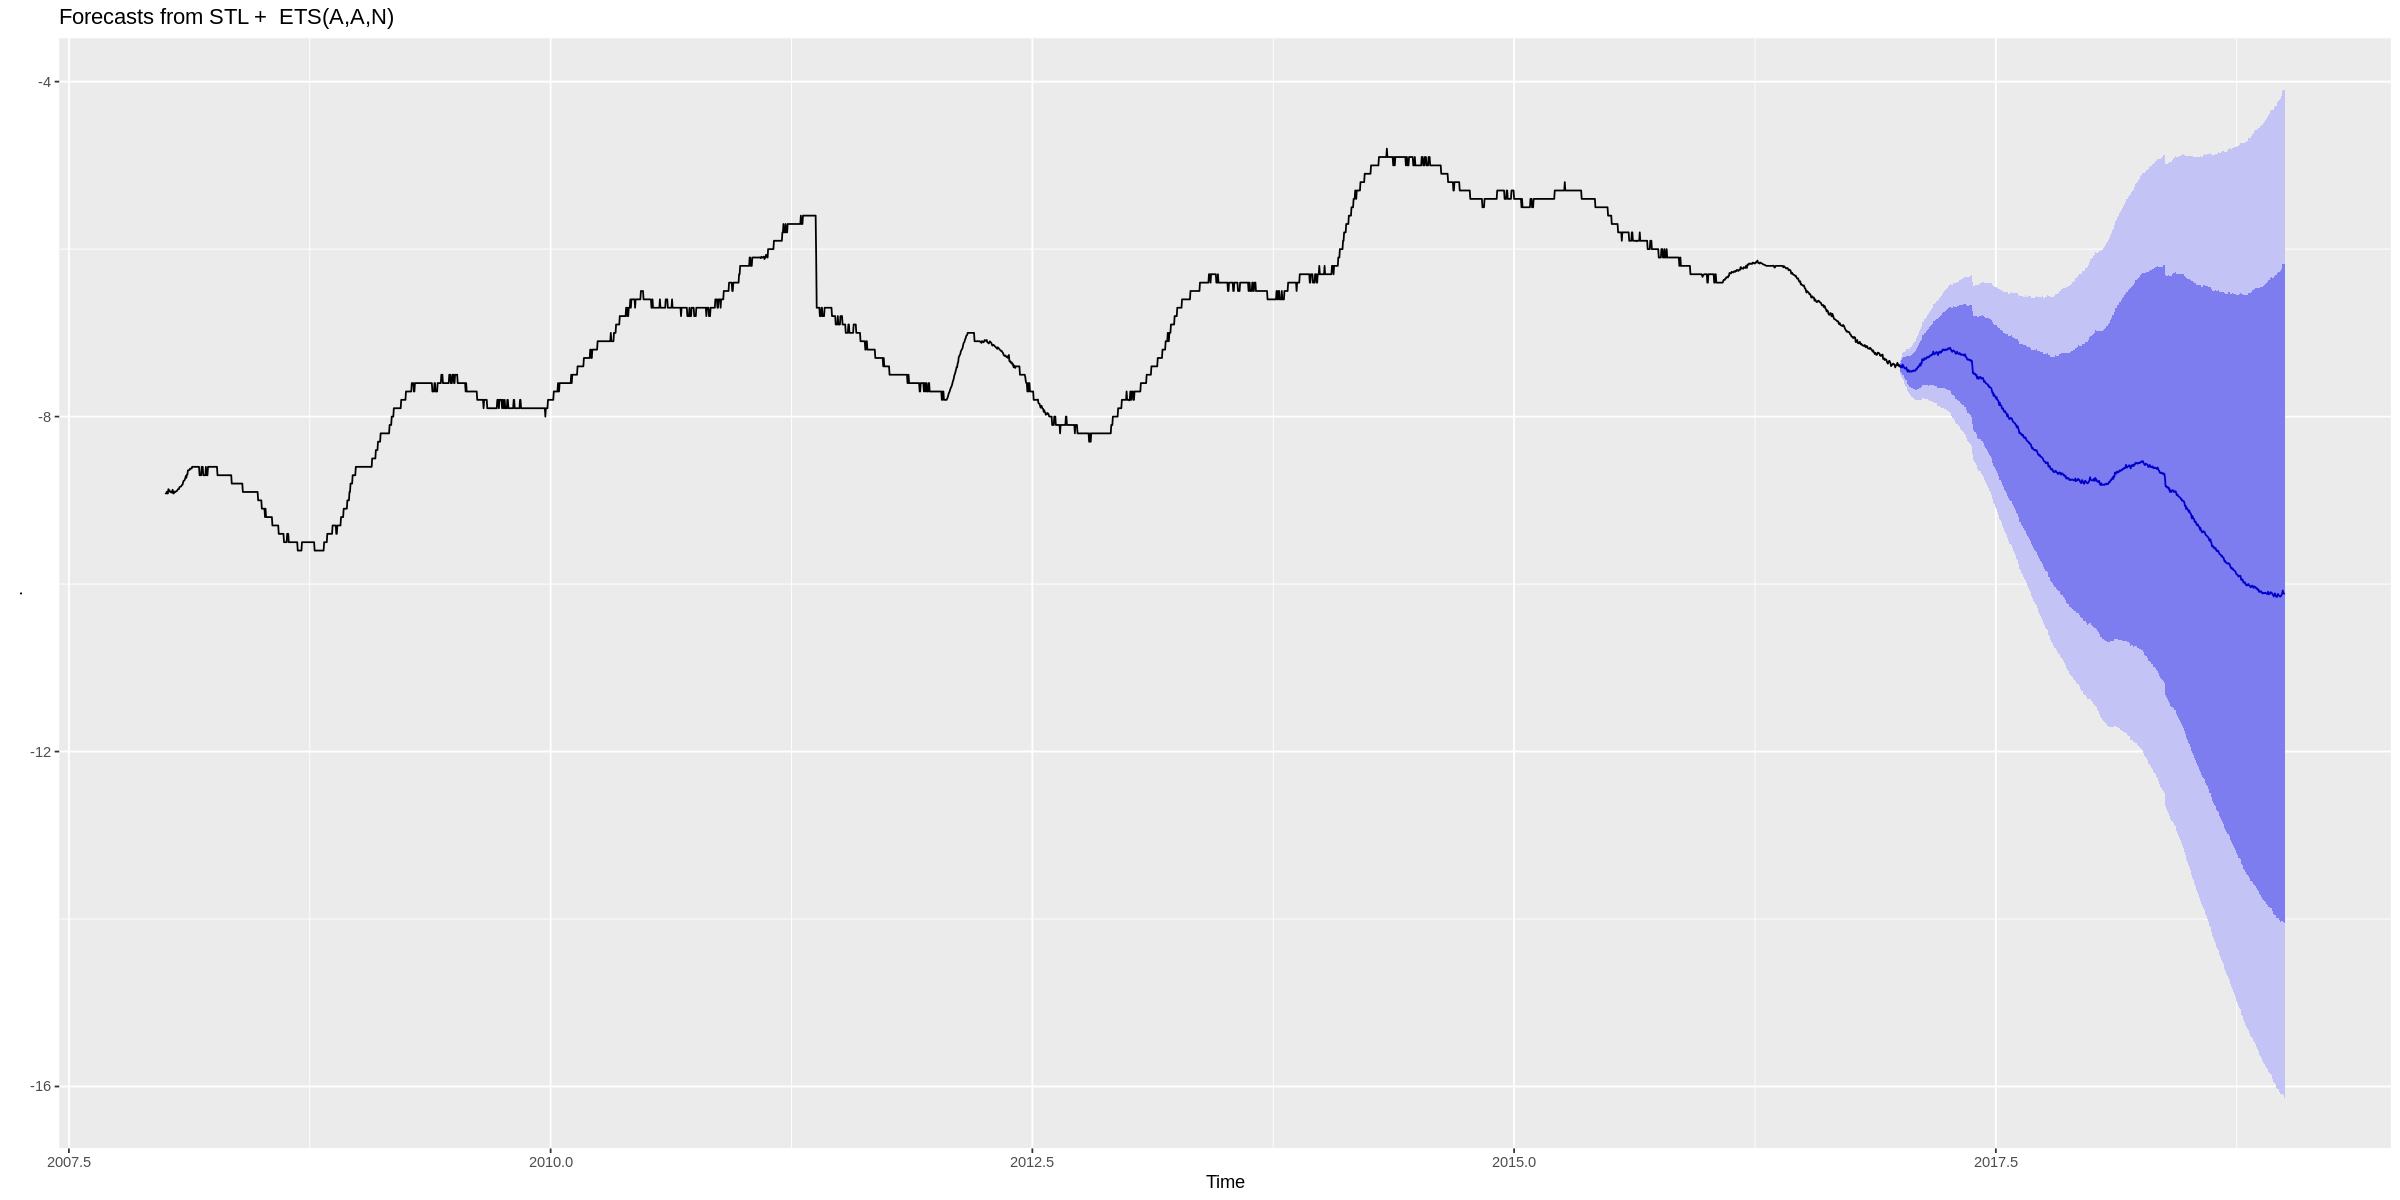

In [156]:
# plot stlf and ets
autoplot(output_stlf_ets)

## Test against Test Data

In [158]:
# get the forecast 
# Arima
fc_arima <- forecast(output_arima310010, h=365*2)

# Exponential
fc_ets <- forecast(output_ets_boxcox_fit, h=365*2)

In [159]:
# get the accuracy
accuracy_snaive <- accuracy(output_snaive, luco_test)
accuracy_arima <- accuracy(fc_arima, luco_test)
accuracy_ets <- accuracy(fc_ets, luco_test)
accuracy_stlf_arima <- accuracy(output_stlf_arima, luco_test)
accuracy_stlf_ets <- accuracy(output_stlf_ets, luco_test)

In [160]:
# turn the accuracy into dataframe
accuracy_snaive_res <- as.data.frame(accuracy_snaive[2,])
accuracy_arima_res <- as.data.frame(accuracy_arima[2,])
accuracy_ets_res <- as.data.frame(accuracy_ets[2,])
accuracy_stlf_arima_res <- as.data.frame(accuracy_stlf_arima[2,])
accuracy_stlf_ets_res <- as.data.frame(accuracy_stlf_ets[2,])

accuracy_df <- cbind(accuracy_snaive_res, accuracy_arima_res, accuracy_ets_res, accuracy_stlf_arima_res, accuracy_stlf_ets_res)
colnames(accuracy_df) <- c("Snaive", "Arima", "ETS", "STL + Arima", "STL + ETS")

accuracy_df

,Snaive,Arima,ETS,STL + Arima,STL + ETS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ME,-1.0676831,0.4548056,-0.2067296,1.1857434,0.8917956
RMSE,1.1498810,0.7527757,0.4020906,1.5307598,1.2612297
MAE,1.0676831,0.4914967,0.3004299,1.1864412,0.9027106
MPE,13.8025351,-6.0420758,2.4931374,-15.5241401,-11.7056612
MAPE,13.8025351,6.5122891,3.7759228,15.5335107,11.8545125
MASE,1.0621725,0.4889599,0.2988793,1.1803176,0.8980514
ACF1,0.9913278,0.9961502,0.9967400,0.9964643,0.9964874
Theil's U,42.7068663,28.9902339,14.3492167,58.6465778,48.4197707


Saving 6.67 x 6.67 in image



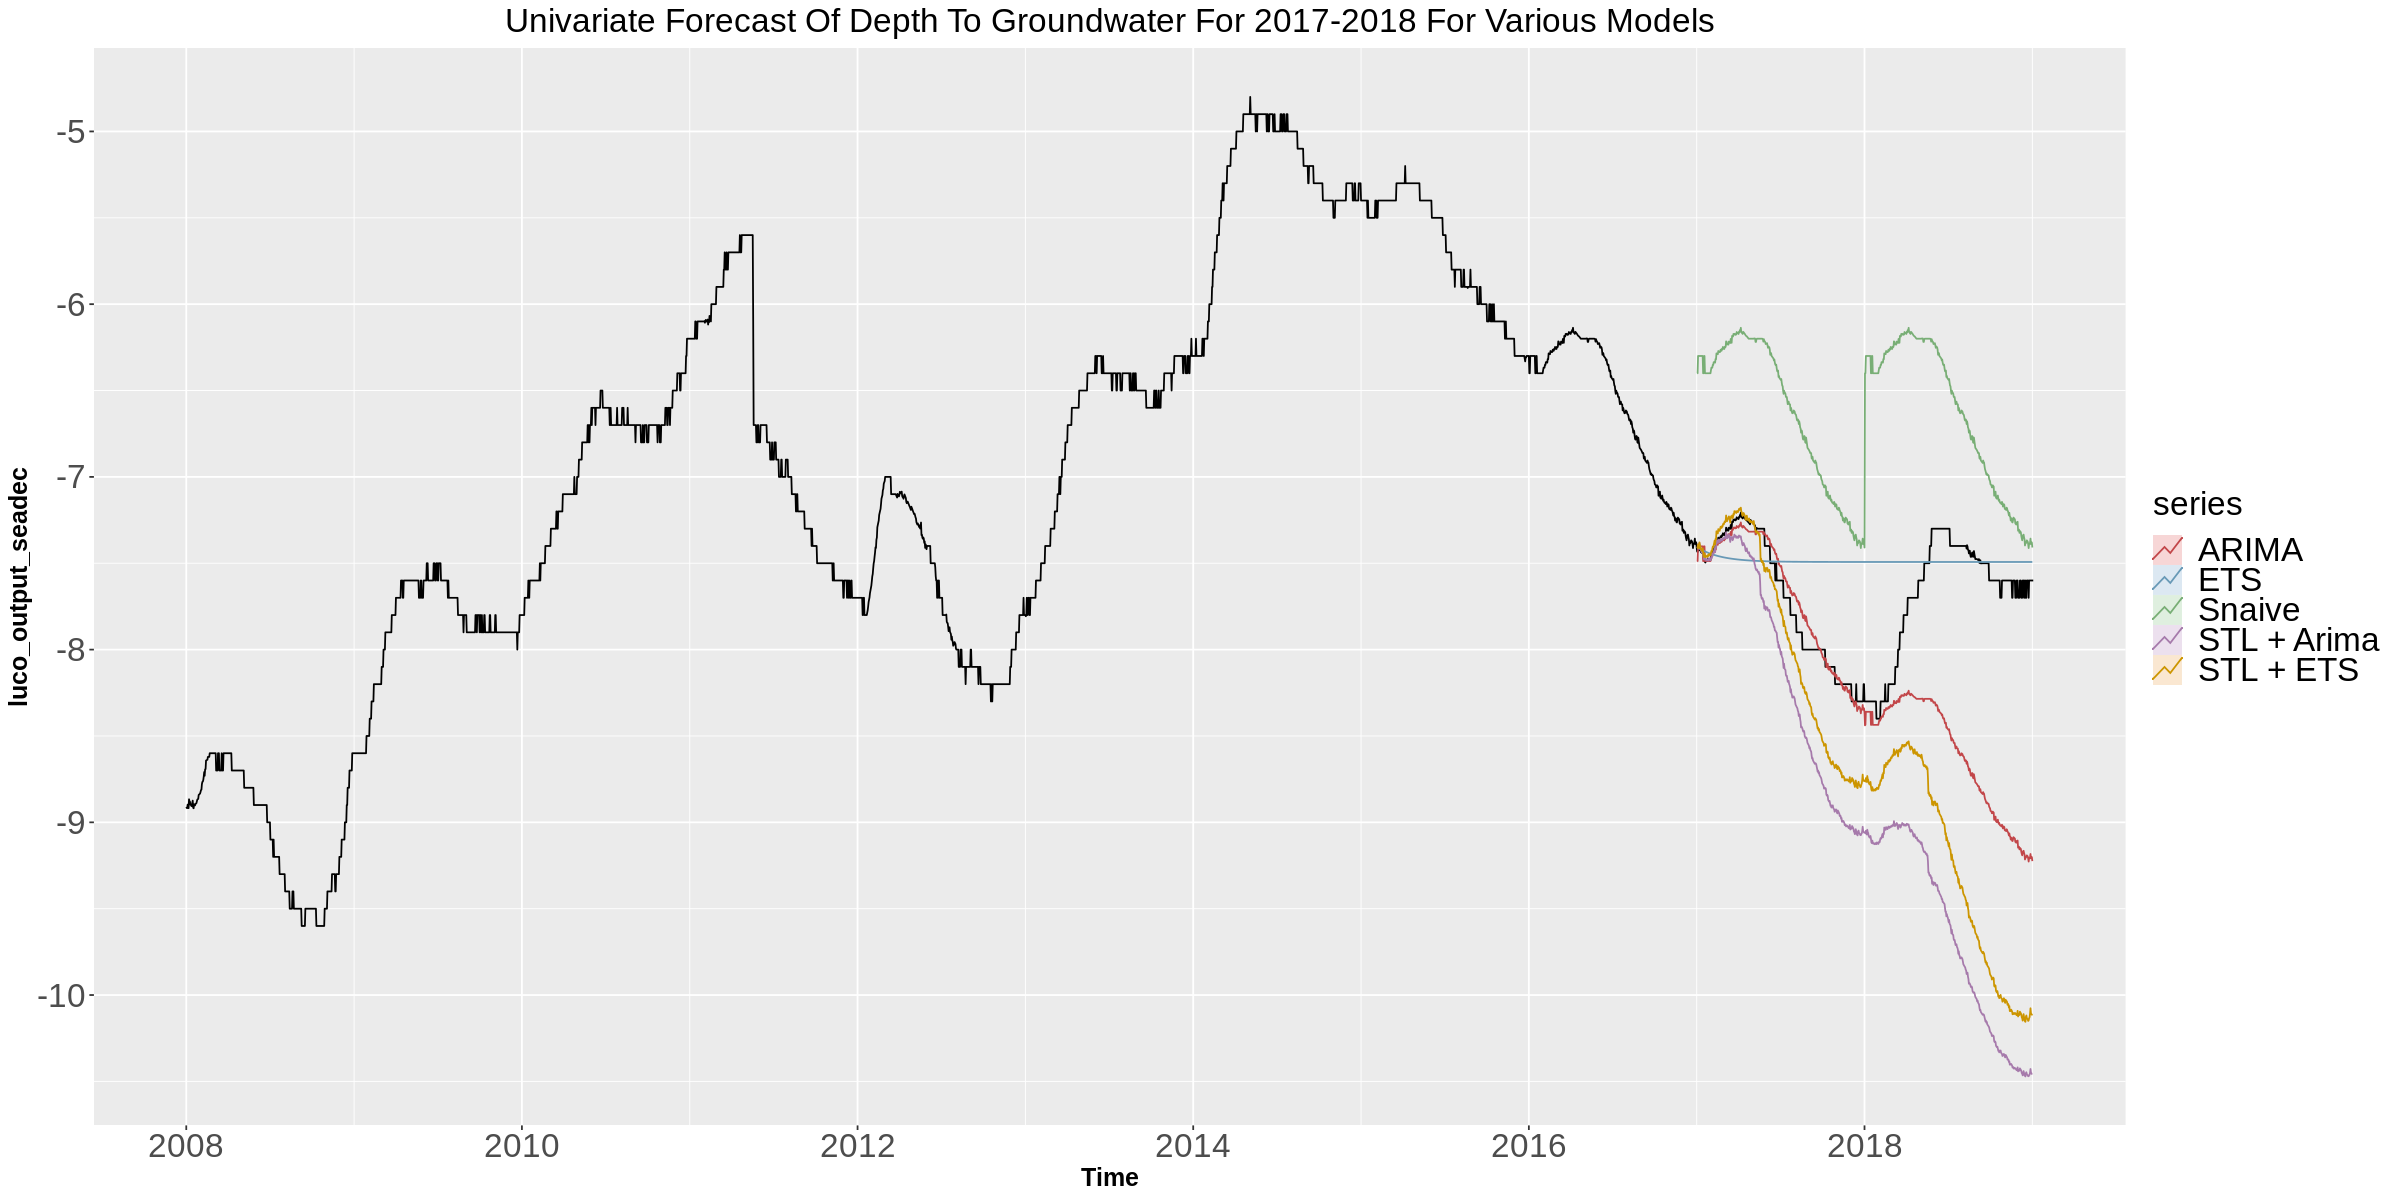

In [173]:
# plot the forecast
autoplot(luco_output_seadec) + 
    autolayer(fc_arima, PI=FALSE, series="ARIMA") +
    autolayer(fc_ets, PI = FALSE, series="ETS") +
    autolayer(output_snaive, PI = FALSE, series="Snaive") +
    autolayer(output_stlf_arima, PI = FALSE, series="STL + Arima") +
    autolayer(output_stlf_ets, PI = FALSE, series="STL + ETS") +
    scale_colour_brewer(palette = "Set1") +
    ggtitle("Univariate Forecast Of Depth To Groundwater For 2017-2018 For Various Models") +
    theme(axis.text=element_text(size=20),
        axis.title=element_text(size=15,face="bold"),
        plot.title = element_text(hjust = 0.5, size=20),
        legend.title = element_text(size=20),
        legend.text = element_text(size=20))
ggsave("Forecast_plot.png", device = "png", path="/home/han/Projects/ACEA_Water/Images/") 

In [162]:
save.image()